In [1]:
%pip install -r requirements.txt
from IPython.display import clear_output
clear_output()

# Limpiar Datos

In [2]:
import pandas as pd
import numpy as np
import datetime

def clean_data():
    data = pd.read_excel('data/base.xlsx')
# Change column names to lowercase and replace spaces with underscores and remove accents
    data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')
# Convert 'Dia' column to string type
    data['dia'] = data['dia'].astype(str)
# Sacar el día de la semana de día, que es la mitad izquierda antes del espacio
    data['dia_semana'] = data['dia'].apply(lambda x: x.split(' ')[0])
    data['dia_mes'] = data['dia'].apply(lambda x: x.split(' ')[1])
# make 'num_Espera' column with the amount of 'Espera' turned into seconds
    data['num_espera'] = data['espera'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second)
# make 'num_duracion' column with the amount of 'duracion' turned into seconds
    data['num_duracion'] = data['duracion'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second)
# make 'num_entre_llegadas' column with the amount of 'entre_llegadas' turned into seconds
    data['num_entre_llegadas'] = data['entre_llegadas'].apply(lambda x: x.hour * 60*60 + x.minute*60 + x.second) 

#print amount of 'Espera' min or equal to 00:05:00
    print('Porcentaje de clientes que espera menos de 5 minutos: ',data[data['espera'] <= datetime.time(0, 5, 0)].shape[0]/data.shape[0] * 100, '%')
    print('Porcentaje de clientes con Estado Atendido',data[data['estado'] == 'Atendido'].shape[0]/data.shape[0] * 100, '%')
    data.sample(5)
    return data

data = clean_data()
data.sample(5)

Porcentaje de clientes que espera menos de 5 minutos:  97.84214170320794 %
Porcentaje de clientes con Estado Atendido 91.2762520193861 %


,mes,dia,cliente,llegada,tiposerv.,servidor,inicio_serv.,fin_serv.,estado,espera,duracion,entre_llegadas,dia_semana,dia_mes,num_espera,num_duracion,num_entre_llegadas
510,Abril,Lunes 6,49,17:40:24,Cambio Plan,Dayana Perea,17:41:33,17:45:58,Atendido,00:01:09,00:04:25,00:01:18,Lunes,6,69,265,78
7543,Noviembre,Martes 20,32,12:12:57,Tecnica,Rocio Peña,12:14:13,12:24:28,Atendido,00:01:16,00:10:15,00:05:25,Martes,20,76,615,325
77,Abril,Miercoles 1,78,19:41:28,Tecnica,Daniel Medina,19:42:17,19:52:52,Atendido,00:00:49,00:10:35,00:00:13,Miercoles,1,49,635,13
6050,Noviembre,Viernes 2,56,15:08:24,Cancelacion,Dayana Perea,15:09:19,15:20:08,Atendido,00:00:55,00:10:49,00:17:01,Viernes,2,55,649,1021
8030,Noviembre,Domingo 25,30,11:45:26,Facturacion,Margarita Beltran,11:46:10,11:52:27,Atendido,00:00:44,00:06:17,00:23:02,Domingo,25,44,377,1382


# Analisis de Tiempo entre arribos

## Independencia

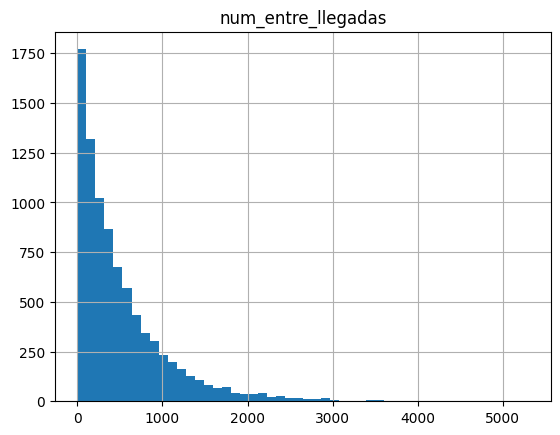

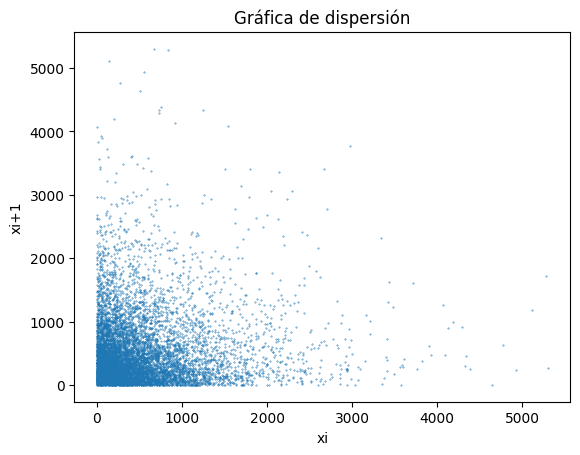

Corridas arriba y abajo
     Co = 5849
     Z = 1.8345512078243318
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
Corridas arriba y abajo para la media
     Co = 191
     Z = 0.30816875540875377
        Z0.05 = 1.959963984540054
     H0: Los numeros son independientes
     H1: Los numeros no son independientes
     ----Se acepta H0----


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from distfit import distfit
import statsmodels as sm


def scatter_plot(x):
    """
    Gráfica de dispersión
    :param x: lista de números pseudoaleatorios
    """
    plt.scatter(x[:-1], x[1:], s=1000/len(x))
    #change dots size to be smaller
    plt.title('Gráfica de dispersión')
    plt.xlabel('xi')
    plt.ylabel('xi+1')
    plt.show()
def corridas_arriba_y_abajo(x, _alfa=0.05):
    """
    Prueba de corridas arriba y abajo
    :param x: lista de números pseudoaleatorios
    """
    n = len(x)
    mu = (2*n-1)/3
    sigma2 = (16*n-29)/90

    S = [1 if x[i] < x[i+1] else 0 for i in range(n-1)]
    Co = sum(abs(S[i] - S[i+1]) for i in range(n-2))
    Z = abs((Co - mu)/sigma2**0.5)
    print('Corridas arriba y abajo')
    print('     Co =', Co)
    print('     Z =', Z)
    print(f'        Z{_alfa} =', stats.norm.ppf(1-_alfa/2))
    print('     H0: Los números son independientes')
    print('     H1: Los números no son independientes')
    if Z < stats.norm.ppf(1-_alfa/2):
        print('     ----Se acepta H0----')
    else:
        print('     ----Se rechaza H0----')
def corridas_arriba_y_abajo_media(x, _alfa = 0.05):
    """
    Prueba de corridas arriba y abajo para la media
    :param x: lista de números pseudoaleatorios
    """
    n = len(x)
    media = 0.5

    S = [1 if x[i] < media else 0 for i in range(n)]
    Co = sum(abs(S[i] - S[i+1]) for i in range(n-1))
    n1 = sum(S)
    n0 = n - n1

    mu = (2*n0*n1)/(n) + 1/2
    sigma2 = (2*n0*n1*(2*n0*n1-n))/(n**2*(n-1))

    Z = abs((Co - mu)/sigma2**0.5)
    print('Corridas arriba y abajo para la media')
    print('     Co =', Co)
    print('     Z =', Z)
    print(f'        Z{_alfa} =', stats.norm.ppf(1-_alfa/2))
    print('     H0: Los numeros son independientes')
    print('     H1: Los numeros no son independientes')
    if Z < stats.norm.ppf(1-_alfa/2):
        print('     ----Se acepta H0----')
    else:
        print('     ----Se rechaza H0----')
data.hist(column='num_entre_llegadas', bins=50)
plt.show()
scatter_plot(data['num_entre_llegadas'].values)
corridas_arriba_y_abajo(data['num_entre_llegadas'].values)
corridas_arriba_y_abajo_media(data['num_entre_llegadas'].values)


## Homogeneidad

In [4]:
from pyhomogeneity import pettitt_test, snht_test
h = pettitt_test(data['num_entre_llegadas'].values)
print(h)
print(f'Test de Pettitt: {h[2]} < 0.05, {"si" if h[2] < 0.05 else "no"} se rechaza H0 la homogeneidad')

Pettitt_Test(h=True, cp=4071, p=0.00035, U=997889.0, avg=mean(mu1=546.4770326701056, mu2=495.9055495103373))
Test de Pettitt: 0.00035 < 0.05, si se rechaza H0 la homogeneidad


## Bondad de Ajuste

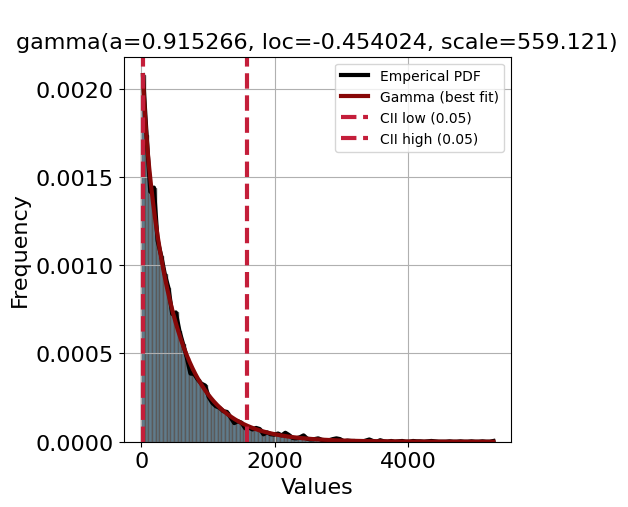

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,gamma,0.0,-0.454024,559.121144,"(0.9152661516409748,)","(0.9152661516409748, -0.45402424048329837, 559...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,halfgennorm,0.0,-0.0,407.793034,"(0.8601677241983237,)","(0.8601677241983237, -3.5868698140327503e-13, ...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,pareto,0.0,-6243.874061,6243.874061,"(13.012754218200794,)","(13.012754218200794, -6243.874060864054, 6243....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,weibull_min,0.0,-0.0,499.482161,"(0.9158905644106207,)","(0.9158905644106207, -4.528445302559136e-26, 4...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,gengamma,0.0,-0.0,577.194483,"(0.9187362920999111, 1.0348367927512525)","(0.9187362920999111, 1.0348367927512525, -6.34...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,semicircular,0.000015,2033.674234,3267.620954,(),"(2033.6742338797594, 3267.6209544572926)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,lognorm,0.000017,-0.0,0.070364,"(78.52039306723925,)","(78.52039306723925, -5e-324, 0.07036433755528851)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,weibull_max,0.00002,5301.0,1.722278,"(0.101818415800871,)","(0.101818415800871, 5301.000000000001, 1.72227...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,2.451102,-0.486079,1,"(0.03340528628170301,)","(0.03340528628170301, -0.4860793638826184, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


In [5]:
from distfit import distfit
dist = distfit(distr='full', verbose=0)
dist.fit_transform(data['num_entre_llegadas'].values)
dist.plot(figsize=(5,5))
plt.show()
dist.summary

# Analisis de Tiempo de Servicio

In [6]:
data_ = {}
for i in data['tiposerv.'].unique():
    # Filter by tipo de servicio and estado = 'Atendido'
    data_[i] = data[data['tiposerv.']==i][data['estado']!='Abandono']


## Independencia

----Tecnica----


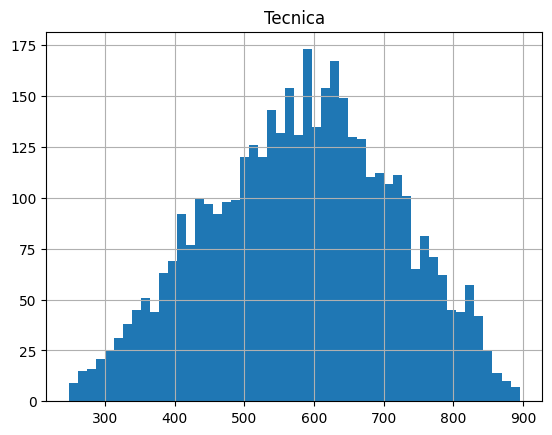

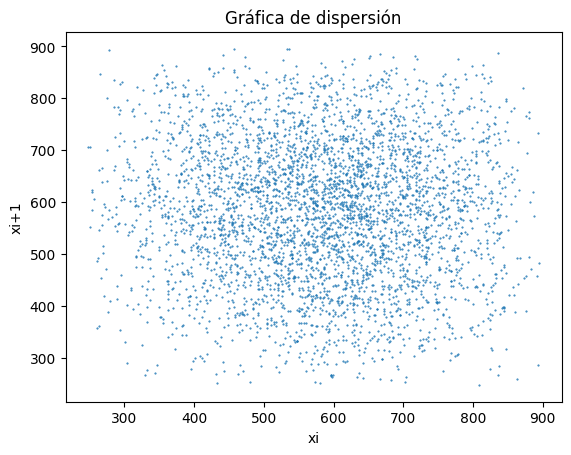

Corridas arriba y abajo
     Co = 2776
     Z = 1.3692751378391101
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Cancelacion----


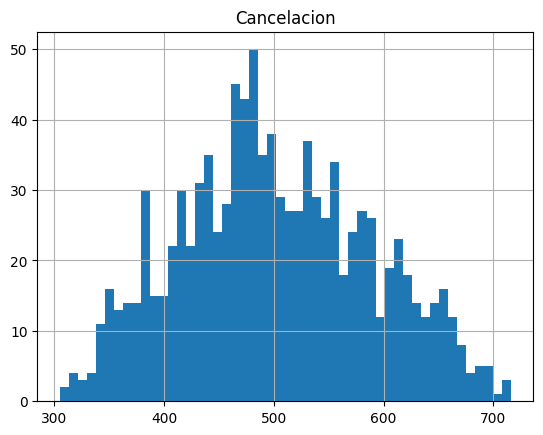

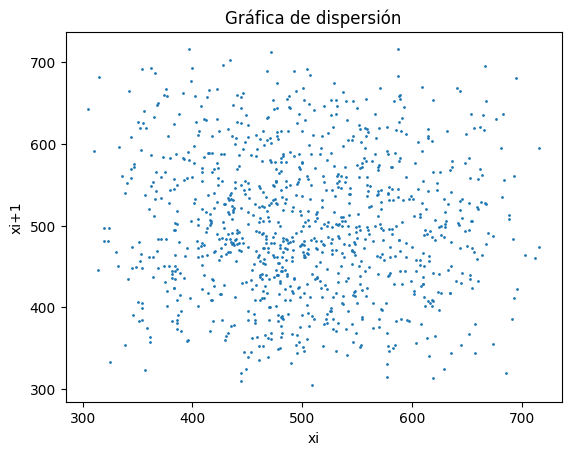

Corridas arriba y abajo
     Co = 675
     Z = 0.04969806954703981
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Otro----


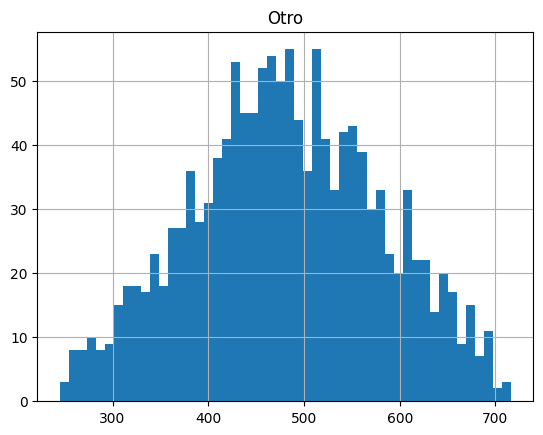

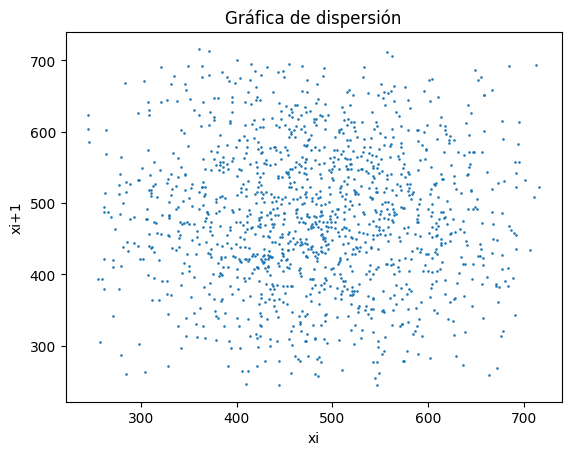

Corridas arriba y abajo
     Co = 893
     Z = 0.47350714322464693
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Facturacion----


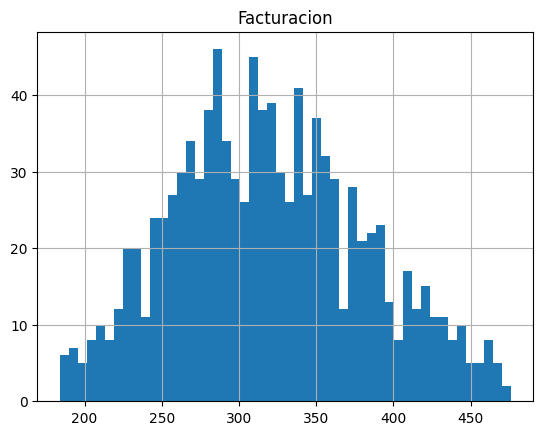

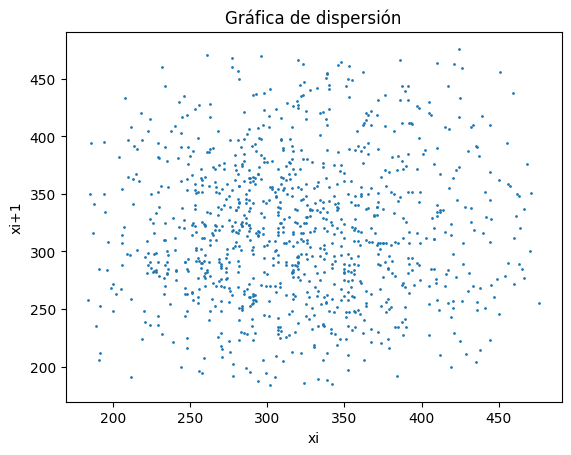

Corridas arriba y abajo
     Co = 679
     Z = 0.444221069798078
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----Cambio Plan----


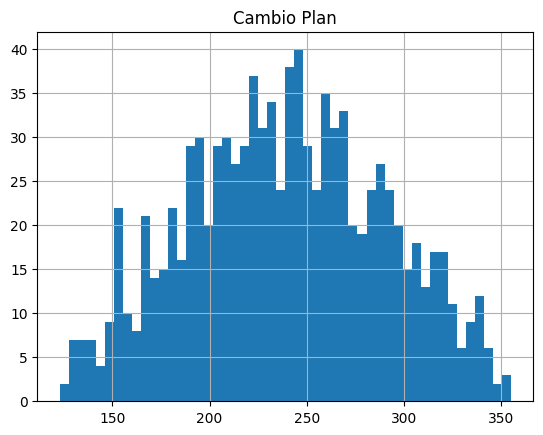

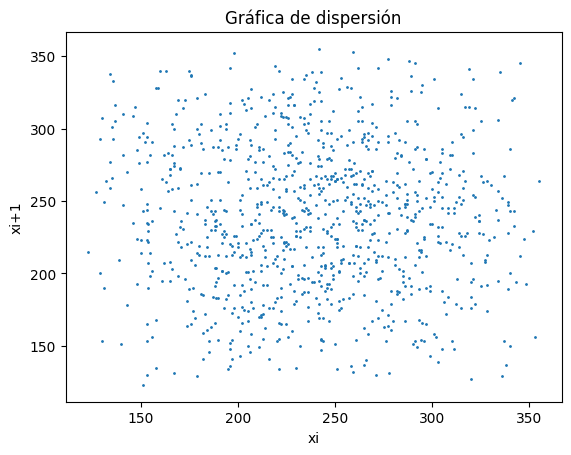

Corridas arriba y abajo
     Co = 649
     Z = 0.15189630035117052
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------


In [7]:
for i in data_:
    print(f'----{i}----')
    data_[i]['num_duracion'].hist(bins=50)
    plt.title(i)
    plt.show()
    scatter_plot(data_[i]['num_duracion'])
    corridas_arriba_y_abajo(data_[i]['num_duracion'].values)
    # corridas_arriba_y_abajo_media(data_[i]['num_duracion'].values)
    print("-------------------------------------------")

## Homogeneidad

In [8]:
for i in data_:
    print(f'----{i}----')
    h = pettitt_test(data_[i]['num_duracion'].values)
    print(f'Para los datos por tipo de servicio: {i}\nTest de Pettitt: {h[2]} < 0.05, {"si" if h[2] < 0.05 else "no"} se rechaza H0 la homogeneidad')

----Tecnica----
Para los datos por tipo de servicio: Tecnica
Test de Pettitt: 0.426 < 0.05, no se rechaza H0 la homogeneidad
----Cancelacion----
Para los datos por tipo de servicio: Cancelacion
Test de Pettitt: 0.33985 < 0.05, no se rechaza H0 la homogeneidad
----Otro----
Para los datos por tipo de servicio: Otro
Test de Pettitt: 0.4405 < 0.05, no se rechaza H0 la homogeneidad
----Facturacion----
Para los datos por tipo de servicio: Facturacion
Test de Pettitt: 0.9865 < 0.05, no se rechaza H0 la homogeneidad
----Cambio Plan----
Para los datos por tipo de servicio: Cambio Plan
Test de Pettitt: 0.60455 < 0.05, no se rechaza H0 la homogeneidad


## Bondad de Ajuste

----Tecnica----


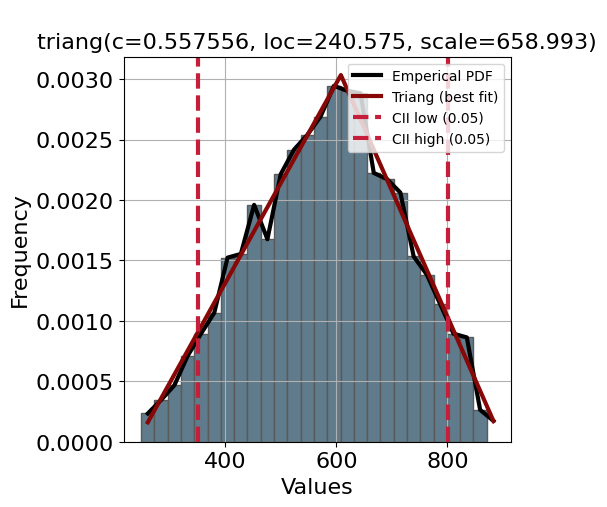

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.0,240.574875,658.992631,"(0.5575557417264498,)","(0.5575557417264498, 240.57487462928313, 658.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,gausshyper,0.000001,246.918042,682.631052,"(1.3754142503464344, 3.4640305853733677, -4.49...","(1.3754142503464344, 3.4640305853733677, -4.49...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,beta,0.000001,209.906652,701.398417,"(3.0655077272828852, 2.7102121366257848)","(3.0655077272828852, 2.7102121366257848, 209.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,johnsonsb,0.000001,177.362217,765.397004,"(-0.16555250894863602, 1.2487379694931822)","(-0.16555250894863602, 1.2487379694931822, 177...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,weibull_min,0.000001,139.495161,491.014897,"(3.7386822079482886,)","(3.7386822079482886, 139.49516103255405, 491.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000093,895.0,1.700553,"(0.15508869418850724,)","(0.15508869418850724, 895.0000000000001, 1.700...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,halfgennorm,0.0001,248.0,1.324706,"(0.257328463506869,)","(0.257328463506869, 248.0, 1.3247059359290563)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,exponweib,0.000131,248.0,0.251086,"(5.567730782065521, 0.13959494571549252)","(5.567730782065521, 0.13959494571549252, 247.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,powerlognorm,0.00016,247.827397,0.547105,"(0.013963299449236608, 0.5412110001015991)","(0.013963299449236608, 0.5412110001015991, 247...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Cancelacion----


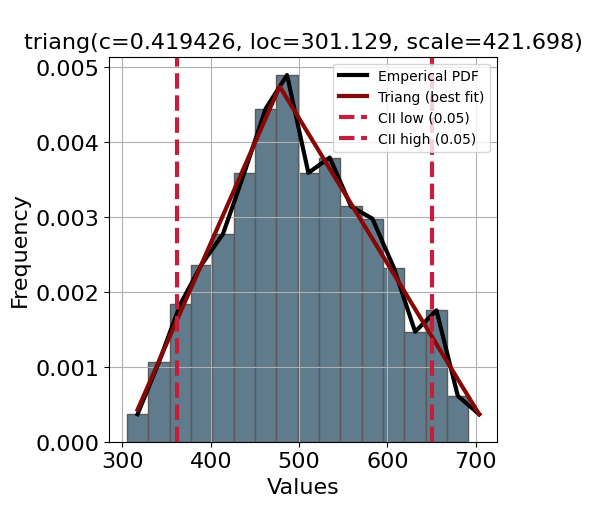

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000001,301.129129,421.697607,"(0.41942583671388245,)","(0.41942583671388245, 301.1291285525042, 421.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,gausshyper,0.000002,295.387602,441.344567,"(2.613075591846653, 2.798666271494679, -0.6391...","(2.613075591846653, 2.798666271494679, -0.6391...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,rice,0.000002,299.61305,97.074291,"(1.7632934036718968,)","(1.7632934036718968, 299.6130504613227, 97.074...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,beta,0.000002,296.452066,441.993478,"(2.539646327669204, 2.9357293685140355)","(2.539646327669204, 2.9357293685140355, 296.45...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,weibull_min,0.000002,282.719706,245.783778,"(2.75643804051644,)","(2.75643804051644, 282.71970595450796, 245.783...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,halfgennorm,0.000138,305.0,1.3434,"(0.2743816664191555,)","(0.2743816664191555, 304.9999999999999, 1.3434...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,invweibull,0.000156,304.994065,1.539153,"(0.28139279491283914,)","(0.28139279491283914, 304.99406513444933, 1.53...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000201,302.450238,2.317733,"(7.176924235026312e-07, 0.0026161529495368043)","(7.176924235026312e-07, 0.0026161529495368043,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.414501,-0.877331,1,"(0.04320316418998561,)","(0.04320316418998561, -0.8773307209530898, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Otro----


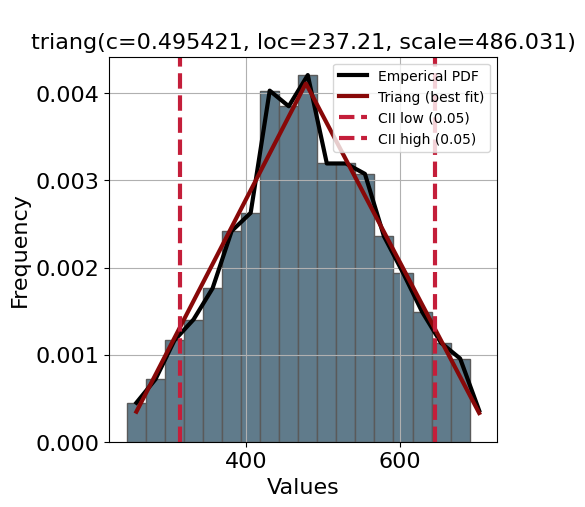

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000001,237.210361,486.030627,"(0.4954207101683704,)","(0.4954207101683704, 237.21036143200746, 486.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,weibull_min,0.000001,186.027918,329.267499,"(3.3231775507959345,)","(3.3231775507959345, 186.02791789464982, 329.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gausshyper,0.000001,187.148416,679.781871,"(4.370412101640536, 3.814764682622412, -1.8640...","(4.370412101640536, 3.814764682622412, -1.8640...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,chi,0.000001,-393.362209,140.544153,"(39.19424830531733,)","(39.19424830531733, -393.36220898846875, 140.5...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,chi2,0.000001,-448.343744,5.389084,"(172.53795784183296,)","(172.53795784183296, -448.34374362527444, 5.38...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,rice,0.000112,420.992962,0.700153,"(1.3403049918910611e-10,)","(1.3403049918910611e-10, 420.99296192292104, 0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,weibull_max,0.000115,716.0,1.61469,"(0.16547533120915298,)","(0.16547533120915298, 716.0000000000002, 1.614...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,halfgennorm,0.000121,245.0,1.37922,"(0.2688490385980778,)","(0.2688490385980778, 245.0, 1.3792197826813721)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,exponweib,0.000121,245.0,0.445487,"(2.0823990232258884, 0.13682071698615292)","(2.0823990232258884, 0.13682071698615292, 244....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Facturacion----


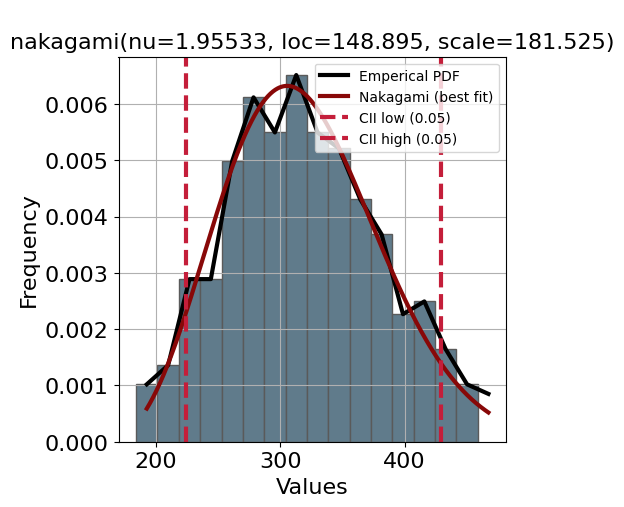

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,nakagami,0.000003,148.894539,181.52518,"(1.9553322197400702,)","(1.9553322197400702, 148.89453912206932, 181.5...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,chi,0.000003,148.89457,91.793426,"(3.9106637205229777,)","(3.9106637205229777, 148.89456979743068, 91.79...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,weibull_min,0.000003,166.857645,171.745363,"(2.6549191879142997,)","(2.6549191879142997, 166.85764498709761, 171.7...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,genextreme,0.000003,295.159213,58.804029,"(0.19627828584088042,)","(0.19627828584088042, 295.1592126404563, 58.80...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,powernorm,0.000003,234.976134,28.724069,"(0.11697083081642537,)","(0.11697083081642537, 234.97613362907066, 28.7...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000264,476.0,1.576148,"(0.17372824689352132,)","(0.17372824689352132, 476.0000000000001, 1.576...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,exponweib,0.000284,184.0,0.395935,"(2.5275957022527873, 0.15388056068489697)","(2.5275957022527873, 0.15388056068489697, 183....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000351,180.932436,2.969047,"(2.5197152108566617e-06, 0.004212393605098211)","(2.5197152108566617e-06, 0.004212393605098211,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,gompertz,0.001228,183.999991,11.038523,"(3.868094950138113e-10,)","(3.868094950138113e-10, 183.9999907001066, 11....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----Cambio Plan----


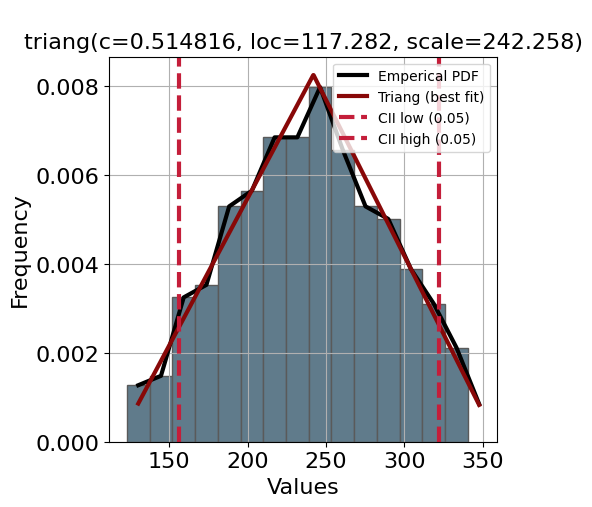

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000002,117.281505,242.258475,"(0.5148158197186122,)","(0.5148158197186122, 117.28150474043093, 242.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,cosine,0.000003,238.882162,43.69897,(),"(238.88216160960988, 43.698970357933305)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gausshyper,0.000003,116.482518,242.153416,"(2.4177271428870997, 2.019612895772154, -0.545...","(2.4177271428870997, 2.019612895772154, -0.545...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,rdist,0.000004,238.891548,121.459099,"(4.660349277101246,)","(4.660349277101246, 238.89154816964367, 121.45...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,beta,0.000004,117.436929,242.917476,"(2.3300311655364663, 2.3302824832751563)","(2.3300311655364663, 2.3302824832751563, 117.4...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000373,355.0,1.522052,"(0.18363296466335483,)","(0.18363296466335483, 355.0000000000001, 1.522...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,gengamma,0.000447,123.0,0.281416,"(2.342842915078694, 0.1922718597640079)","(2.342842915078694, 0.1922718597640079, 122.99...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000495,120.318315,2.610394,"(4.30067985951955e-06, 0.0054739430970840944)","(4.30067985951955e-06, 0.0054739430970840944, ...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,genexpon,0.001431,122.999987,4.296246,"(0.1792966468293884, 0.06296025037700026, 2.16...","(0.1792966468293884, 0.06296025037700026, 2.16...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------


In [9]:
for i in data_:
    print(f'----{i}----')
    dist = distfit(distr='full', verbose=0)
    dist.fit_transform(data_[i]['num_duracion'].values)
    dist.plot(figsize=(5,5))
    plt.show()
    display(dist.summary)
    print("-------------------------------------------")

# Analisis por Cuadrillas

----1-Tecnica----


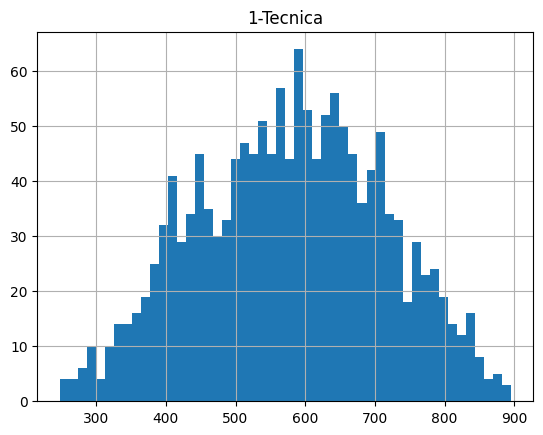

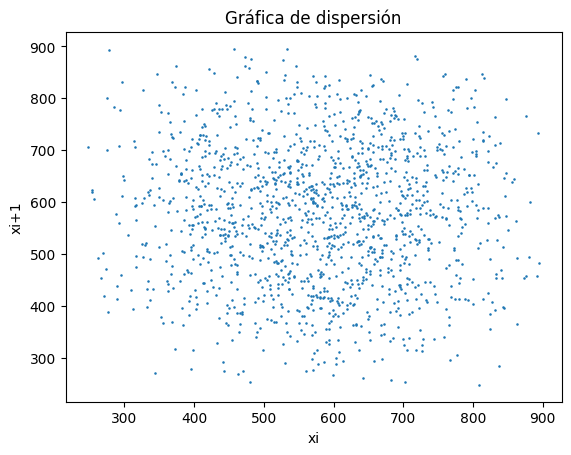

Corridas arriba y abajo
     Co = 983
     Z = 0.16500282634214736
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----1-Cancelacion----


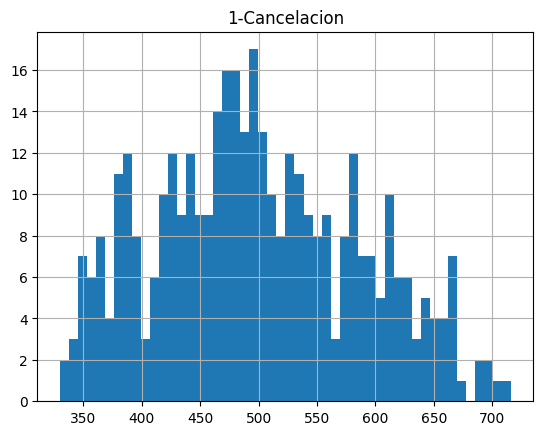

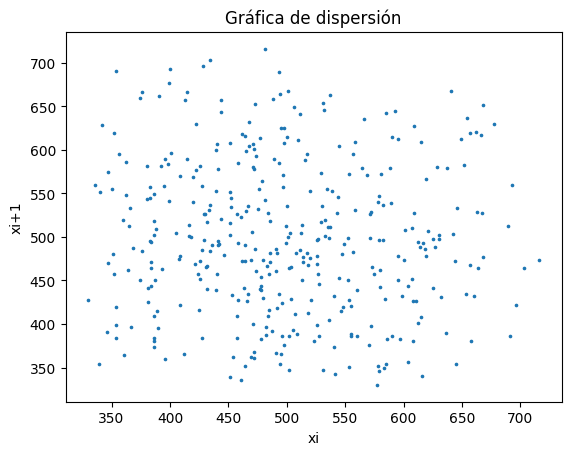

Corridas arriba y abajo
     Co = 269
     Z = 1.8675439633165438
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----1-Otro----


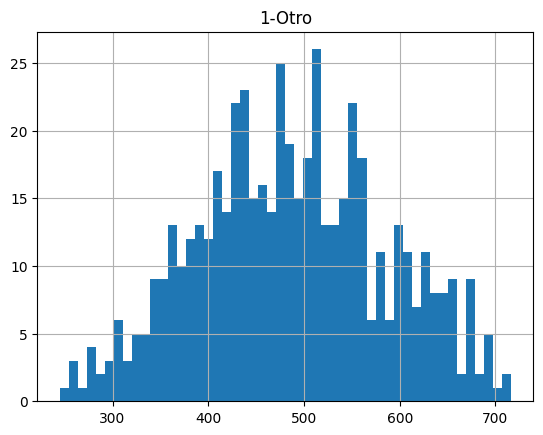

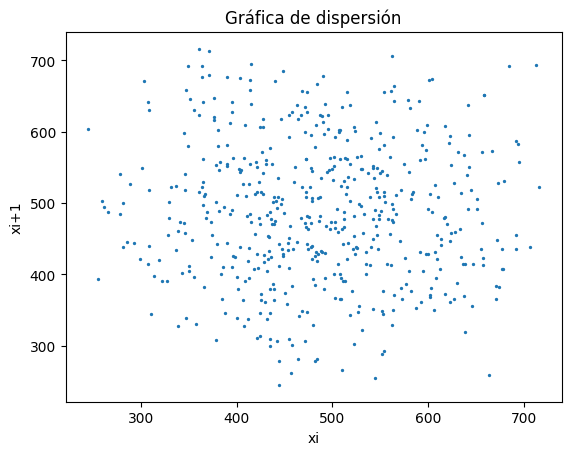

Corridas arriba y abajo
     Co = 340
     Z = 1.138404904472148
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----1-Facturacion----


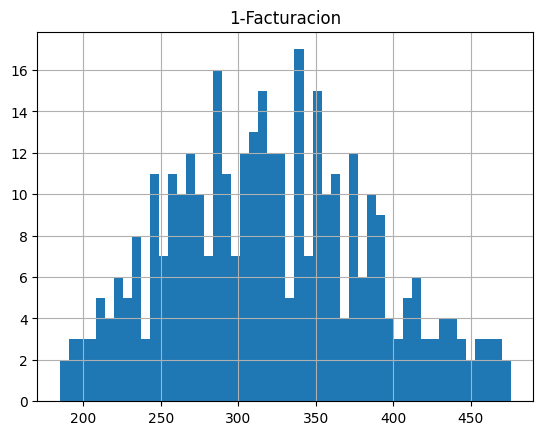

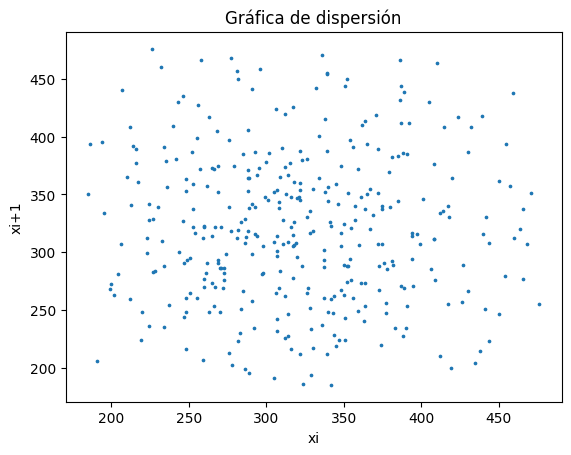

Corridas arriba y abajo
     Co = 248
     Z = 0.8747722243876545
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----1-Cambio Plan----


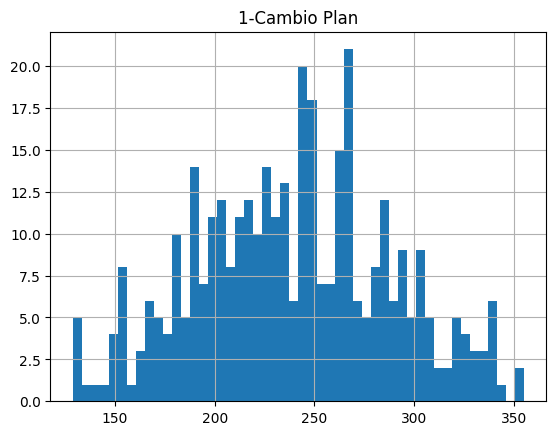

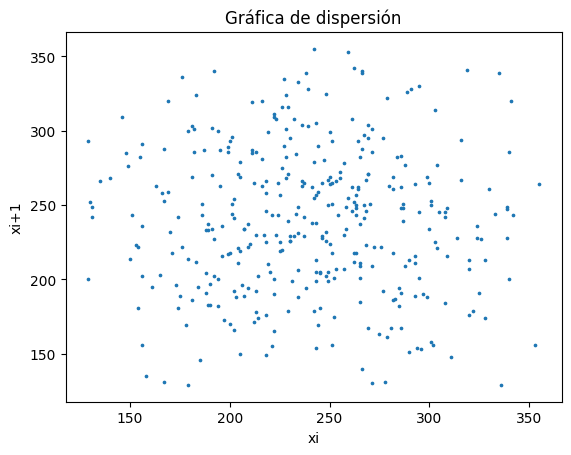

Corridas arriba y abajo
     Co = 238
     Z = 0.5400284401164442
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----2-Tecnica----


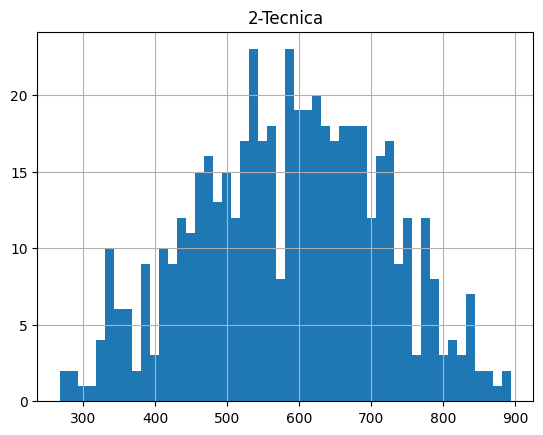

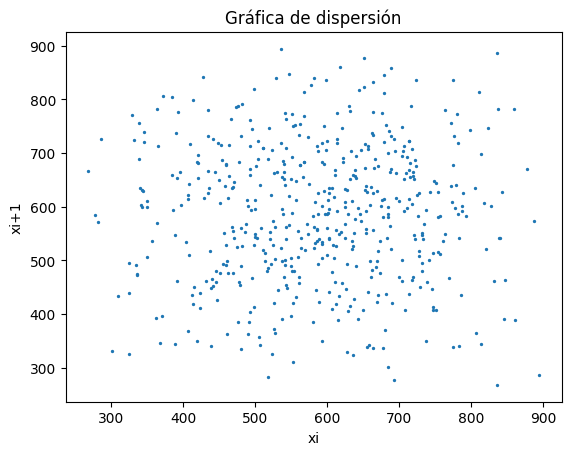

Corridas arriba y abajo
     Co = 339
     Z = 1.1060157394504302
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----2-Cancelacion----


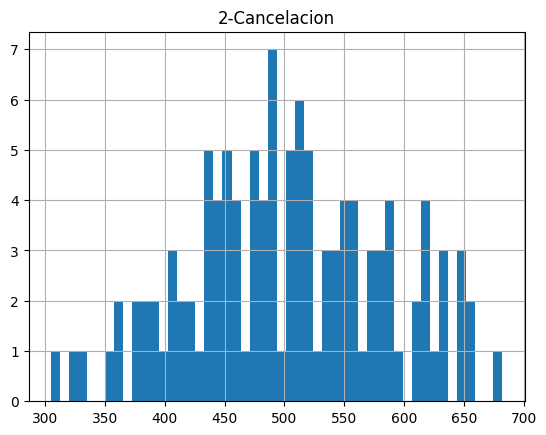

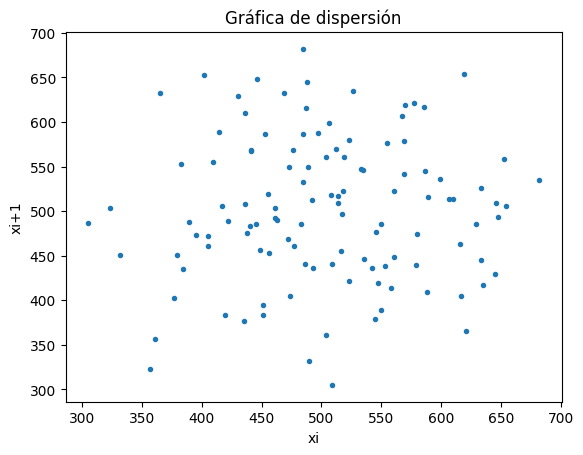

Corridas arriba y abajo
     Co = 75
     Z = 0.4438967616184753
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----2-Otro----


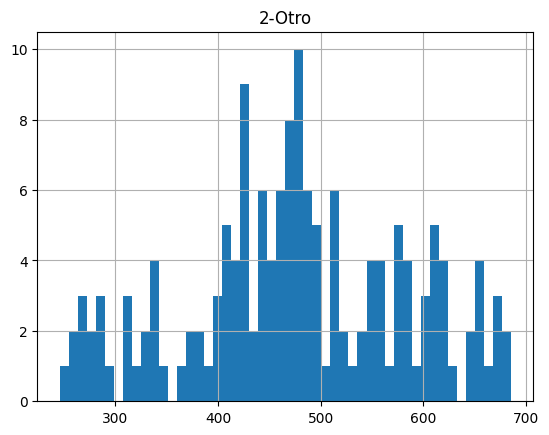

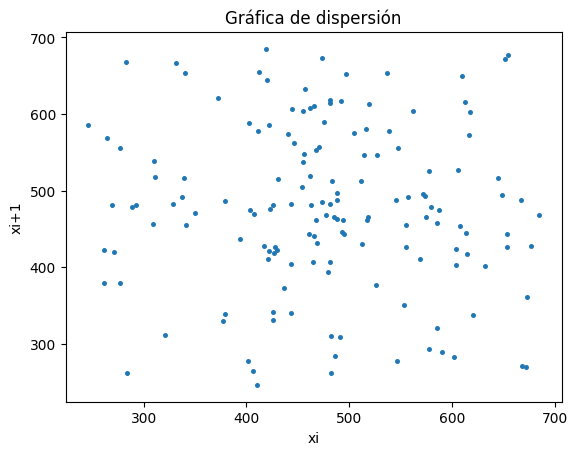

Corridas arriba y abajo
     Co = 99
     Z = 0.5143657621253549
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----2-Facturacion----


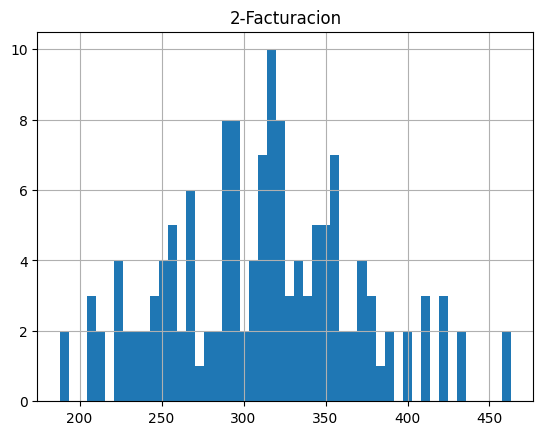

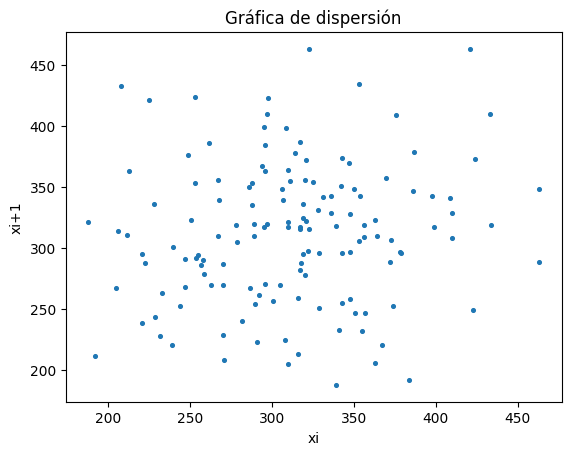

Corridas arriba y abajo
     Co = 93
     Z = 0.2670824518989389
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----2-Cambio Plan----


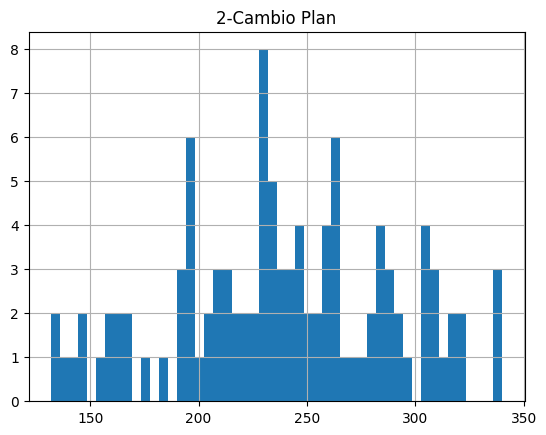

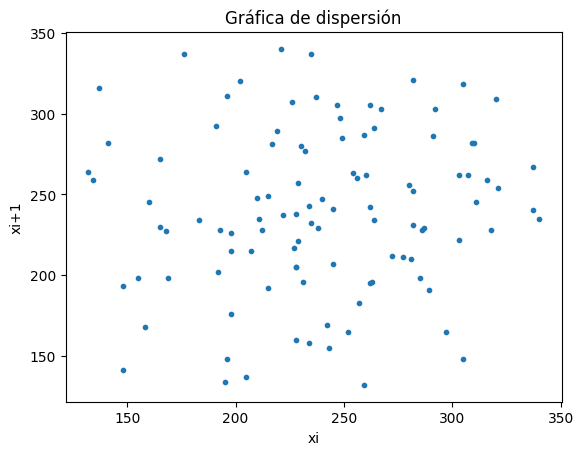

Corridas arriba y abajo
     Co = 65
     Z = 1.239230753906516
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----3-Tecnica----


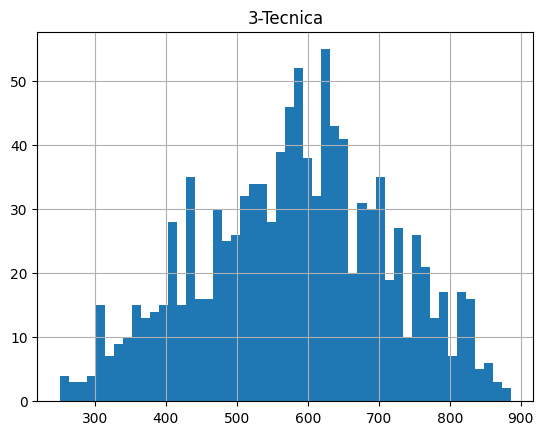

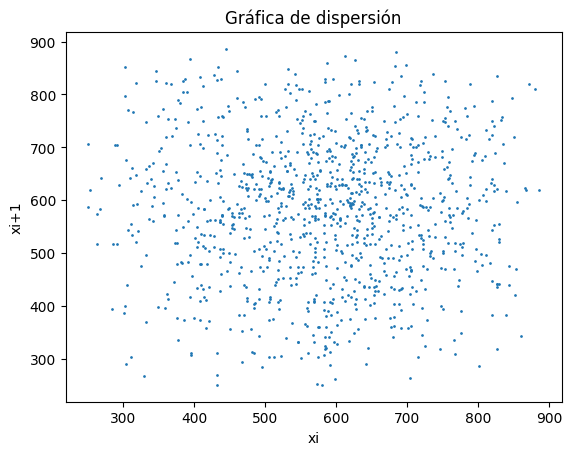

Corridas arriba y abajo
     Co = 752
     Z = 2.237038114201036
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se rechaza H0----
-------------------------------------------
----3-Cancelacion----


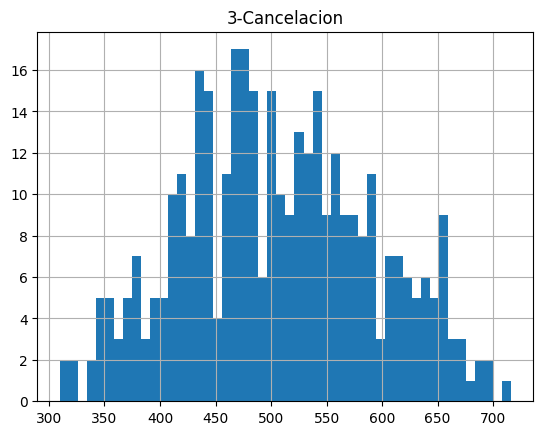

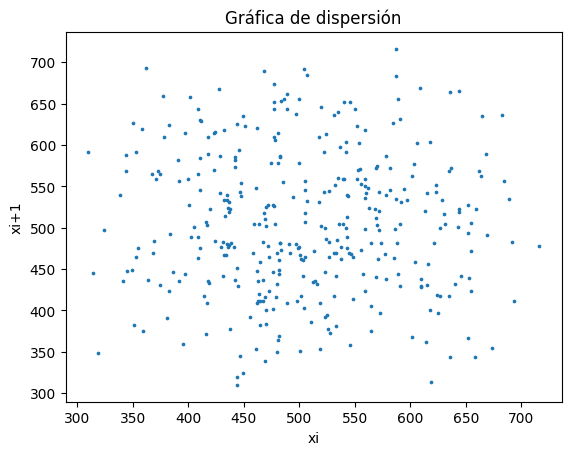

Corridas arriba y abajo
     Co = 233
     Z = 1.325645705613454
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----3-Otro----


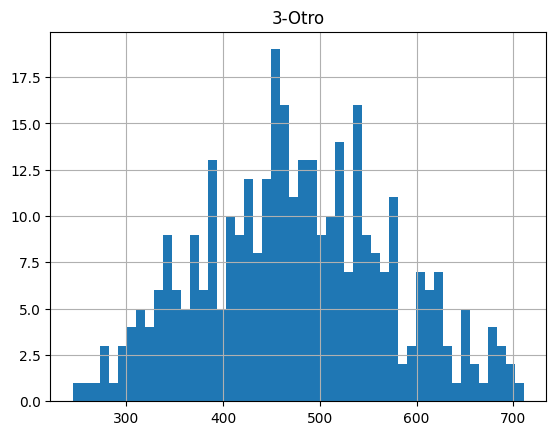

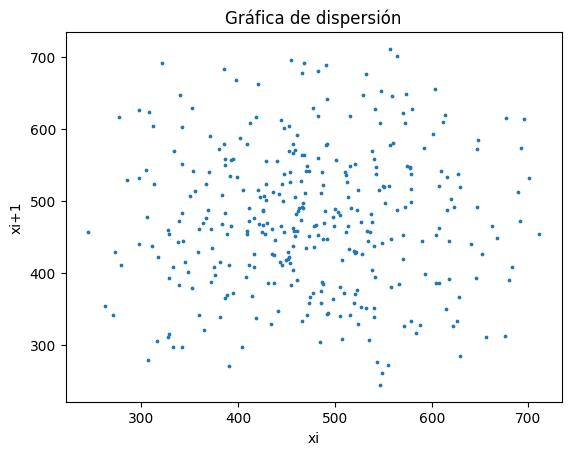

Corridas arriba y abajo
     Co = 223
     Z = 0.6847995014661455
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----3-Facturacion----


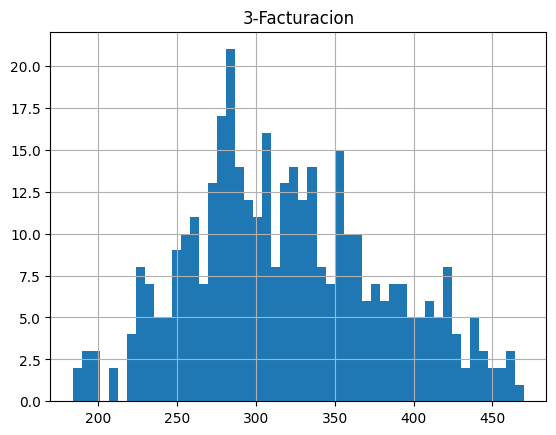

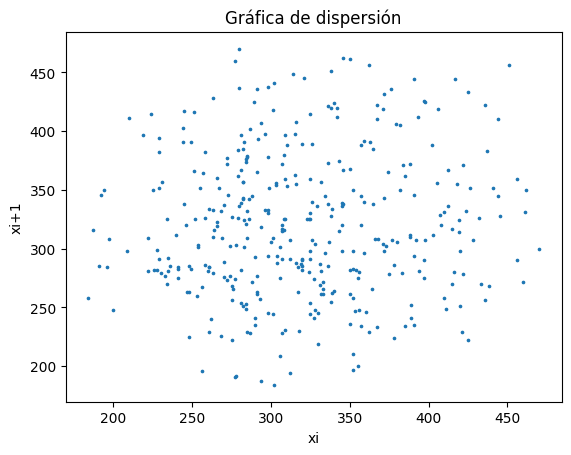

Corridas arriba y abajo
     Co = 241
     Z = 1.0640200516153293
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----3-Cambio Plan----


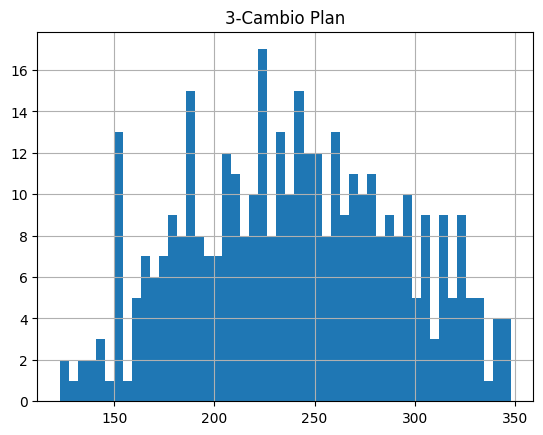

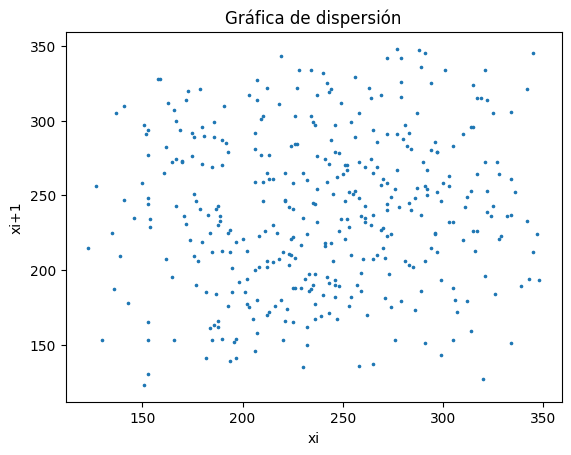

Corridas arriba y abajo
     Co = 248
     Z = 1.247103781845355
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----4-Tecnica----


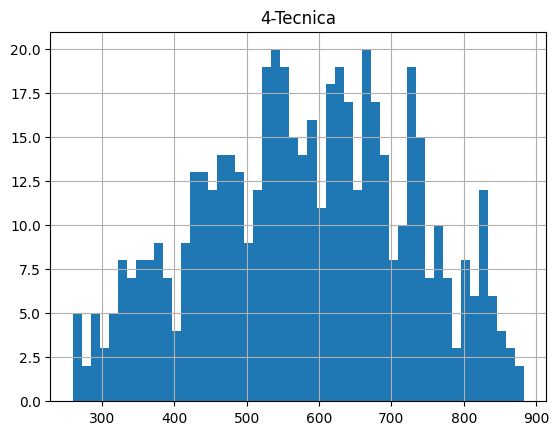

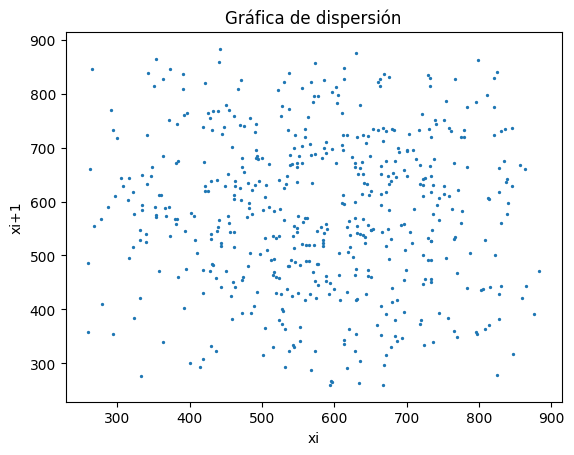

Corridas arriba y abajo
     Co = 345
     Z = 0.8935288266335015
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----4-Cancelacion----


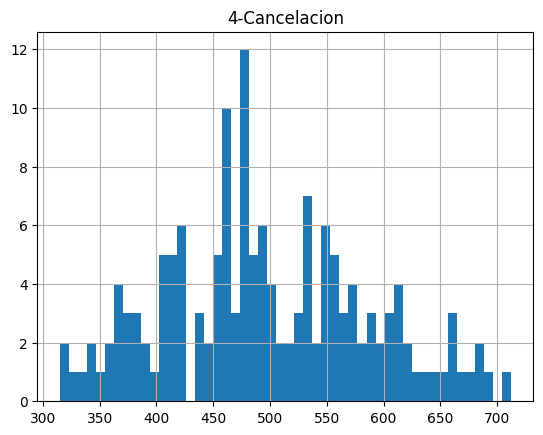

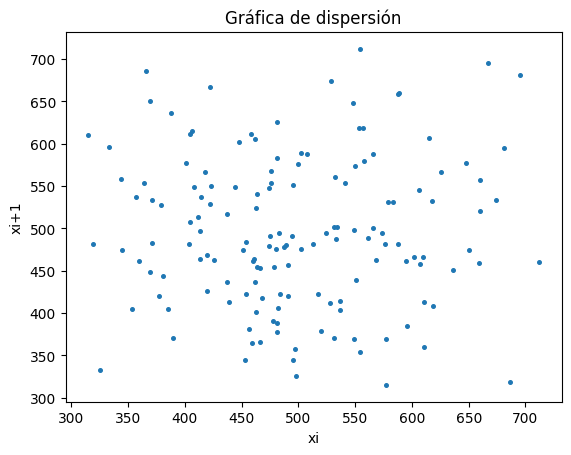

Corridas arriba y abajo
     Co = 94
     Z = 1.229779902719507
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----4-Otro----


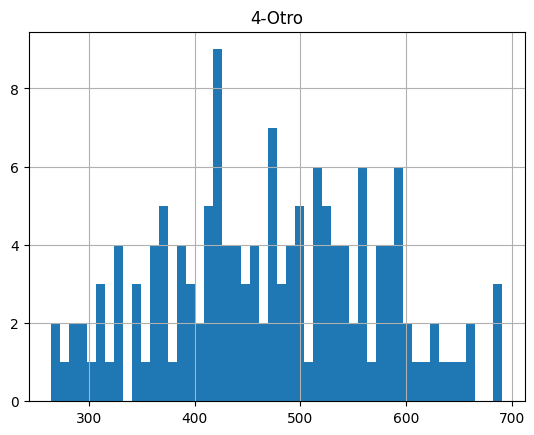

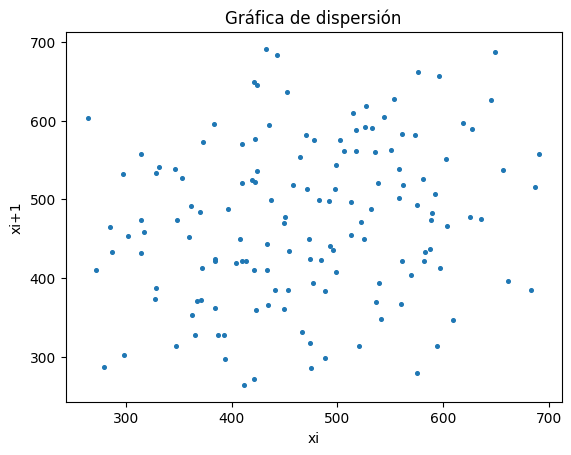

Corridas arriba y abajo
     Co = 88
     Z = 1.7776242528710389
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----4-Facturacion----


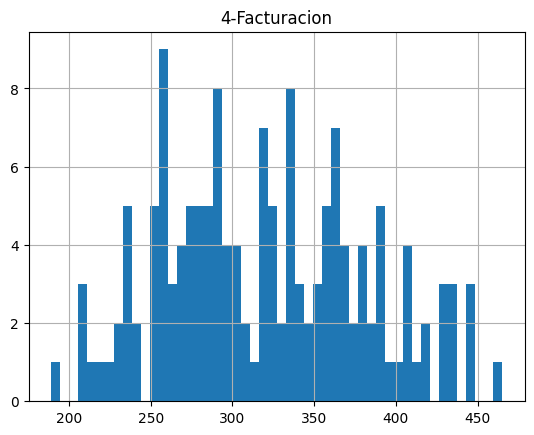

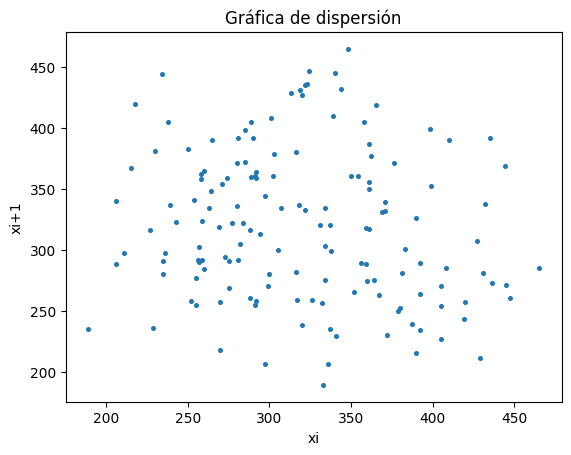

Corridas arriba y abajo
     Co = 99
     Z = 0.0
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----4-Cambio Plan----


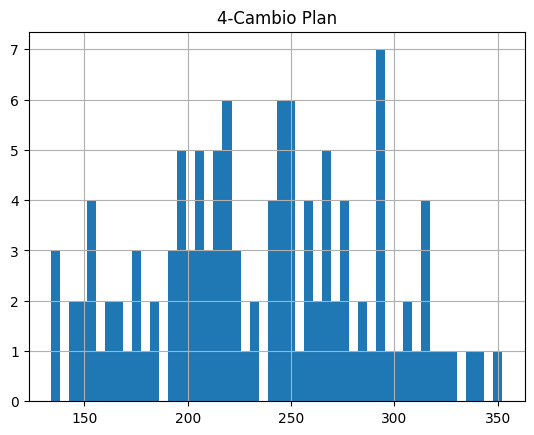

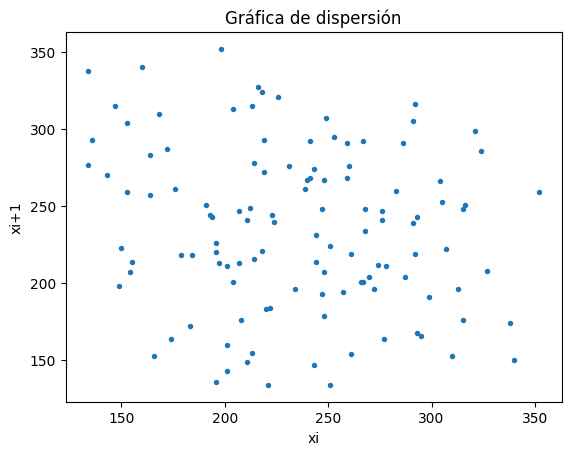

Corridas arriba y abajo
     Co = 83
     Z = 0.8763560920082658
        Z0.05 = 1.959963984540054
     H0: Los números son independientes
     H1: Los números no son independientes
     ----Se acepta H0----
-------------------------------------------
----1-Tecnica----
Para los datos por tipo de servicio: 1-Tecnica
Test de Pettitt: 0.74855 < 0.05, no se rechaza H0 la homogeneidad
----1-Cancelacion----
Para los datos por tipo de servicio: 1-Cancelacion
Test de Pettitt: 0.05195 < 0.05, no se rechaza H0 la homogeneidad
----1-Otro----
Para los datos por tipo de servicio: 1-Otro
Test de Pettitt: 0.05085 < 0.05, no se rechaza H0 la homogeneidad
----1-Facturacion----
Para los datos por tipo de servicio: 1-Facturacion
Test de Pettitt: 0.6035 < 0.05, no se rechaza H0 la homogeneidad
----1-Cambio Plan----
Para los datos por tipo de servicio: 1-Cambio Plan
Test de Pettitt: 0.8695 < 0.05, no se rechaza H0 la homogeneidad
----2-Tecnica----
Para los datos por tipo de servicio: 2-Tecnica
Test de Pett

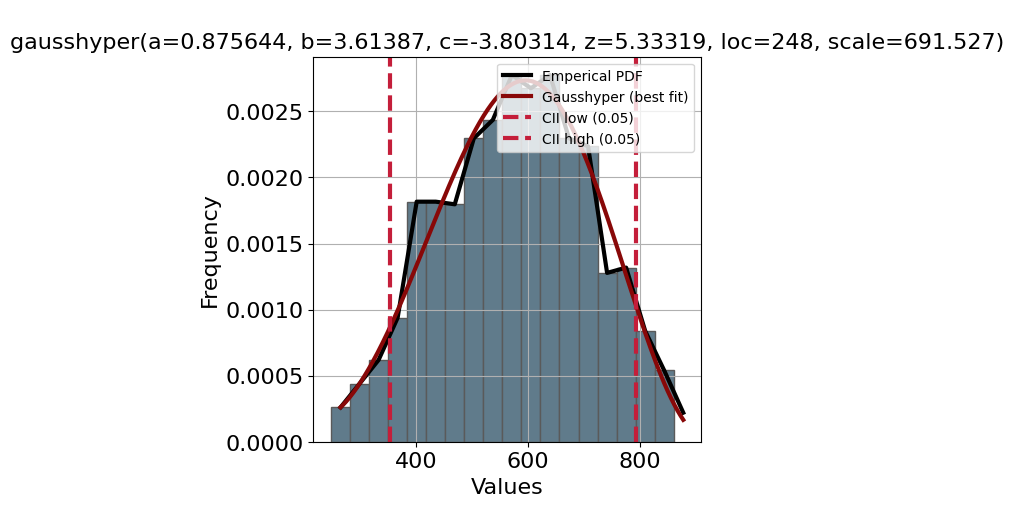

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,gausshyper,0.000001,248.0,691.527174,"(0.8756440141061657, 3.6138660862645806, -3.80...","(0.8756440141061657, 3.6138660862645806, -3.80...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,beta,0.000001,210.227677,710.257413,"(3.11681750720843, 2.8992600952659604)","(3.11681750720843, 2.8992600952659604, 210.227...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,johnsonsb,0.000001,177.125871,775.936451,"(-0.09850540089049784, 1.2793622855540472)","(-0.09850540089049784, 1.2793622855540472, 177...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,triang,0.000001,240.176533,661.830279,"(0.5346135985093938,)","(0.5346135985093938, 240.17653293844228, 661.8...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,cosine,0.000001,576.2502,116.711592,(),"(576.2501996750254, 116.71159213033346)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,genextreme,0.000063,885.195202,53.751141,"(5.482126516185901,)","(5.482126516185901, 885.1952022957113, 53.7511...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,halfgennorm,0.000065,248.0,1.345347,"(0.25797256682586245,)","(0.25797256682586245, 248.0, 1.3453473567415153)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000098,247.139803,0.775287,"(0.0002671899063572531, 0.06901659679490516)","(0.0002671899063572531, 0.06901659679490516, 2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.473857,2.760229,1,"(0.0808050648410735,)","(0.0808050648410735, 2.760228800476712, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----1-Cancelacion----


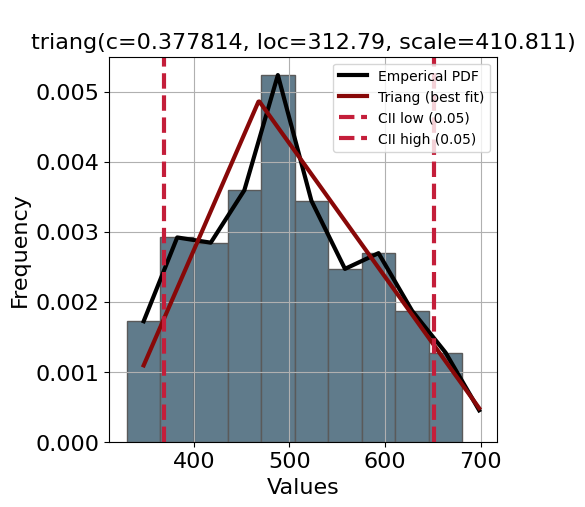

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000003,312.790035,410.810613,"(0.37781391169828415,)","(0.37781391169828415, 312.790035191146, 410.81...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,gausshyper,0.000003,327.295079,403.341269,"(1.714420685886826, 2.49735161165252, 1.594917...","(1.714420685886826, 2.49735161165252, 1.594917...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,beta,0.000003,326.953024,401.569692,"(1.7578637734547682, 2.3608489716223913)","(1.7578637734547682, 2.3608489716223913, 326.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,johnsonsb,0.000003,314.370272,424.577492,"(0.3222343779778945, 0.9894460495433506)","(0.3222343779778945, 0.9894460495433506, 314.3...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,rice,0.000004,318.356069,104.864208,"(1.2809093662359667,)","(1.2809093662359667, 318.3560687922088, 104.86...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,foldnorm,0.00009,461.0,1.461225,"(1.93218407540422e-09,)","(1.93218407540422e-09, 460.99999999775036, 1.4...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,powerlognorm,0.0001,327.228526,2.564263,"(6.0632160270836585e-06, 0.007101783657293522)","(6.0632160270836585e-06, 0.007101783657293522,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,vonmises,0.269899,-0.380609,1,"(0.11171054688722912,)","(0.11171054688722912, -0.3806090523390111, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,mielke,NaN,-2042.173973,1875.450505,"(390719.6039578619, 32.862163559517896)","(390719.6039578619, 32.862163559517896, -2042....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----1-Otro----


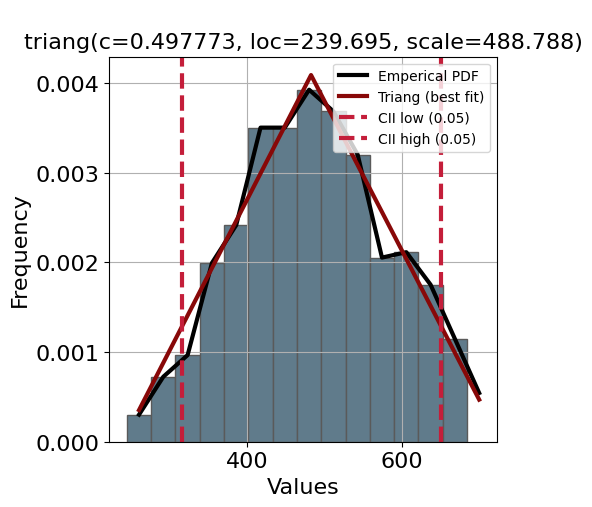

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000001,239.694716,488.787964,"(0.49777265676273186,)","(0.49777265676273186, 239.69471644596933, 488....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,cosine,0.000001,486.718267,86.324356,(),"(486.71826678795543, 86.32435559920734)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,fatiguelife,0.000001,-957.291326,1441.004214,"(0.0686625551822087,)","(0.0686625551822087, -957.2913262374876, 1441....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,weibull_min,0.000001,197.547676,323.114745,"(3.255587581544323,)","(3.255587581544323, 197.5476756042935, 323.114...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,gausshyper,0.000001,179.925273,553.618561,"(7.875359842456261, 2.3969975312290224, 7.2181...","(7.875359842456261, 2.3969975312290224, 7.2181...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,foldnorm,0.000088,412.99983,1.058322,"(3.0031424293092743e-07,)","(3.0031424293092743e-07, 412.99983010323126, 1...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,exponweib,0.000089,245.0,1.302302,"(1.3012938579869506, 0.15795841702649616)","(1.3012938579869506, 0.15795841702649616, 244....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,halfgennorm,0.000093,245.0,1.390205,"(0.2683498063299421,)","(0.2683498063299421, 245.0, 1.3902051919263005)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,invweibull,0.000098,244.996367,1.398871,"(0.26395257119904253,)","(0.26395257119904253, 244.99636661583452, 1.39...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----1-Facturacion----


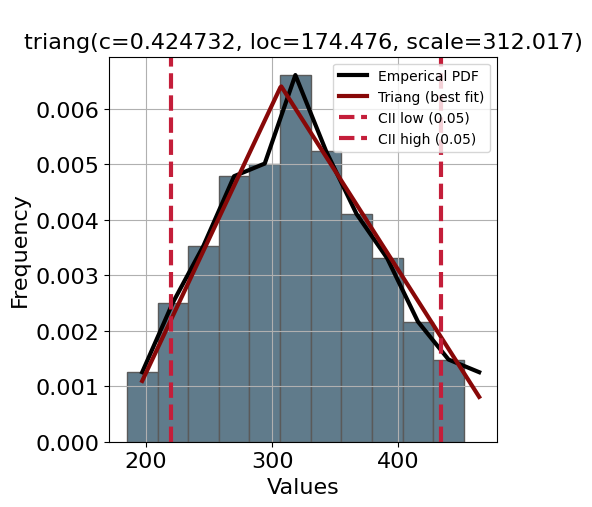

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000002,174.476405,312.017192,"(0.4247317082170371,)","(0.4247317082170371, 174.47640498663202, 312.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,weibull_min,0.000002,164.934534,175.811102,"(2.595090967426394,)","(2.595090967426394, 164.9345341553029, 175.811...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,genextreme,0.000002,296.644653,62.344626,"(0.23383216600255663,)","(0.23383216600255663, 296.64465267421303, 62.3...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,gengamma,0.000002,14.843392,60.052487,"(10.607640085825409, 1.4417287590107941)","(10.607640085825409, 1.4417287590107941, 14.84...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,johnsonsu,0.000002,-288.884882,158.022554,"(-19.90447024418188, 9.686666576452975)","(-19.90447024418188, 9.686666576452975, -288.8...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,exponpow,0.00016,185.0,1.51854,"(0.06727107809010158,)","(0.06727107809010158, 184.99999999999994, 1.51...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,weibull_max,0.000162,476.0,1.581934,"(0.17045187580539337,)","(0.17045187580539337, 476.00000000000006, 1.58...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,exponweib,0.000164,185.0,0.394914,"(2.713038681239067, 0.15054886802296757)","(2.713038681239067, 0.15054886802296757, 184.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,powerlognorm,0.000224,182.316782,2.480744,"(2.0425470502598127e-06, 0.003962326920584047)","(2.0425470502598127e-06, 0.003962326920584047,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----1-Cambio Plan----


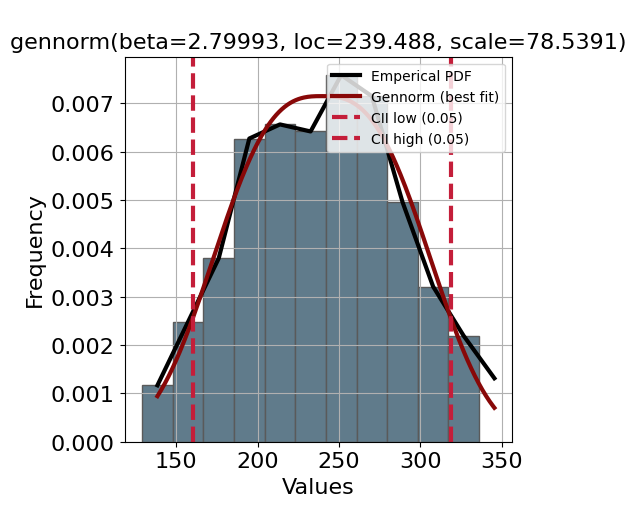

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,gennorm,0.000002,239.4881,78.53912,"(2.799929328385204,)","(2.799929328385204, 239.48809953613892, 78.539...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,cosine,0.000003,239.52003,42.757848,(),"(239.52002990152508, 42.75784843497702)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,tukeylambda,0.000003,239.564192,43.034184,"(0.32304623009654027,)","(0.32304623009654027, 239.56419165756517, 43.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,johnsonsb,0.000003,93.612722,294.80797,"(0.035298735546457724, 1.3454839455053131)","(0.035298735546457724, 1.3454839455053131, 93....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,beta,0.000003,109.551364,262.521291,"(3.051617523076201, 3.1225211515199054)","(3.051617523076201, 3.1225211515199054, 109.55...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,powerlognorm,0.000364,125.697715,2.862915,"(3.620843074786107e-07, 0.0015319396364825684)","(3.620843074786107e-07, 0.0015319396364825684,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,foldnorm,0.000935,224.0,4.729646,"(0.0017766672931057814,)","(0.0017766672931057814, 223.99999995255948, 4....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,rice,0.00483,223.999693,4.736365,"(1.2492284108420272e-07,)","(1.2492284108420272e-07, 223.9996927067677, 4....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.303096,-1.26941,1,"(0.1589872183906504,)","(0.1589872183906504, -1.2694102398693872, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----2-Tecnica----


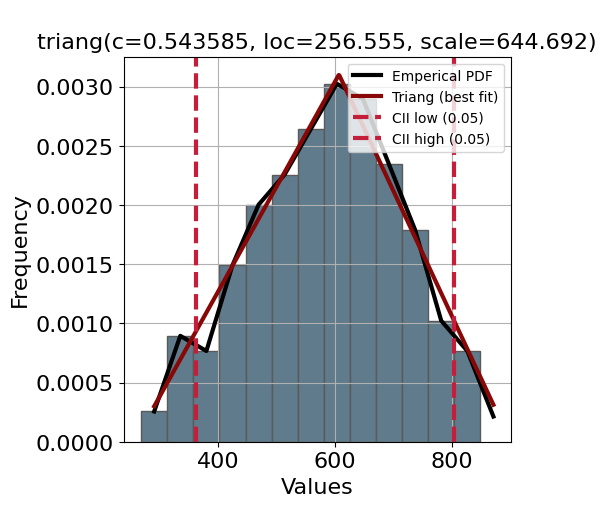

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.0,256.55521,644.692328,"(0.5435845519742796,)","(0.5435845519742796, 256.555209943164, 644.692...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,weibull_min,0.0,159.366454,473.34475,"(3.7421691334166907,)","(3.7421691334166907, 159.36645392275375, 473.3...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,johnsonsb,0.0,173.222915,789.06857,"(-0.14289381815006208, 1.36423678622464)","(-0.14289381815006208, 1.36423678622464, 173.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,beta,0.0,212.111591,714.79454,"(3.4657295261317933, 3.158473157399678)","(3.4657295261317933, 3.158473157399678, 212.11...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,gausshyper,0.0,211.846382,709.713125,"(3.4793985177223092, 2.4631228352431656, -0.73...","(3.4793985177223092, 2.4631228352431656, -0.73...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,gengamma,0.000048,268.0,1.015723,"(1.4881142411037716, 0.16349536022978123)","(1.4881142411037716, 0.16349536022978123, 267....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,halfgennorm,0.000049,268.0,1.362443,"(0.2592235975776022,)","(0.2592235975776022, 268.0, 1.3624426900151891)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,halflogistic,0.00005,267.999972,120.971024,(),"(267.9999722533057, 120.97102379236875)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,exponweib,0.000054,268.0,0.309792,"(4.536685920187125, 0.14136420239933423)","(4.536685920187125, 0.14136420239933423, 267.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----2-Cancelacion----


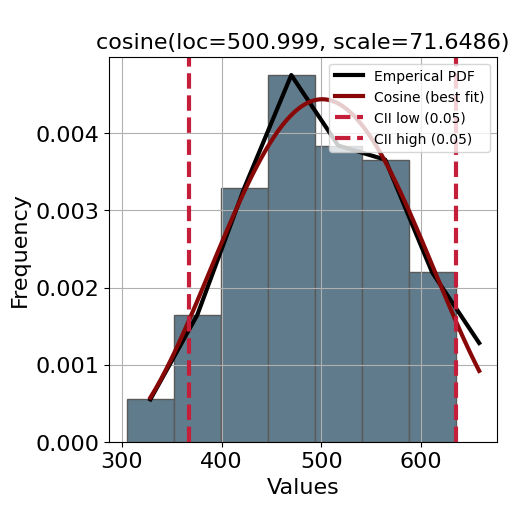

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,cosine,0.000001,500.998758,71.648559,(),"(500.9987581421228, 71.64855866124037)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,rdist,0.000001,500.863249,226.34278,"(6.674003200978442,)","(6.674003200978442, 500.8632493762889, 226.342...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,tukeylambda,0.000001,501.079002,70.631318,"(0.3098293310402078,)","(0.3098293310402078, 501.07900221174486, 70.63...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,gennorm,0.000001,503.248866,131.601909,"(2.8251037453885606,)","(2.8251037453885606, 503.24886597164584, 131.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,gausshyper,0.000001,214.152029,482.259187,"(8.21283577617594, 2.143720056429978, 11.07361...","(8.21283577617594, 2.143720056429978, 11.07361...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,exponpow,0.000066,305.0,1.707685,"(0.06554281865228079,)","(0.06554281865228079, 304.99999999999994, 1.70...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,gompertz,0.000071,4913.322217,0.0,"(1.587732985707383,)","(1.587732985707383, 4913.322216620594, 4.53372...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000081,302.689624,1.611814,"(2.205288380178759e-06, 0.004976812861093829)","(2.205288380178759e-06, 0.004976812861093829, ...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,wrapcauchy,0.000088,305.0,60.001414,"(0.5,)","(0.5, 305.0, 60.001413545644546)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----2-Otro----


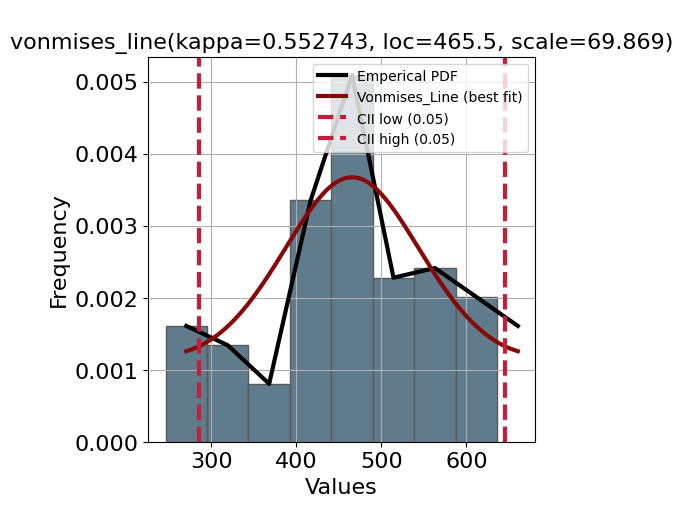

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,vonmises_line,0.000006,465.500008,69.869024,"(0.5527426882364155,)","(0.5527426882364155, 465.5000080524808, 69.869...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,loglaplace,0.000006,-1.273567,477.273556,"(5.45621857420497,)","(5.45621857420497, -1.273567114476311, 477.273...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,laplace,0.000006,476.0,84.261438,(),"(476.0, 84.26143790849673)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,dgamma,0.000007,472.401052,72.789434,"(1.1585031353462174,)","(1.1585031353462174, 472.40105244291, 72.78943...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,triang,0.000007,219.202219,499.095817,"(0.5245441298921383,)","(0.5245441298921383, 219.20221891655464, 499.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,genexpon,0.00006,245.706048,2.275579,"(0.847466018559912, 0.0017847200937511198, 9.6...","(0.847466018559912, 0.0017847200937511198, 9.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,chi2,0.00006,246.0,2.004792,"(0.047849271258568346,)","(0.047849271258568346, 245.99999999999997, 2.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,foldnorm,0.00006,261.0,1.2598,"(1.8062356200406474e-08,)","(1.8062356200406474e-08, 260.99999966405176, 1...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,gompertz,0.001103,602.440617,6.211142,"(2.3859744209021807e-05,)","(2.3859744209021807e-05, 602.4406169609078, 6....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----2-Facturacion----


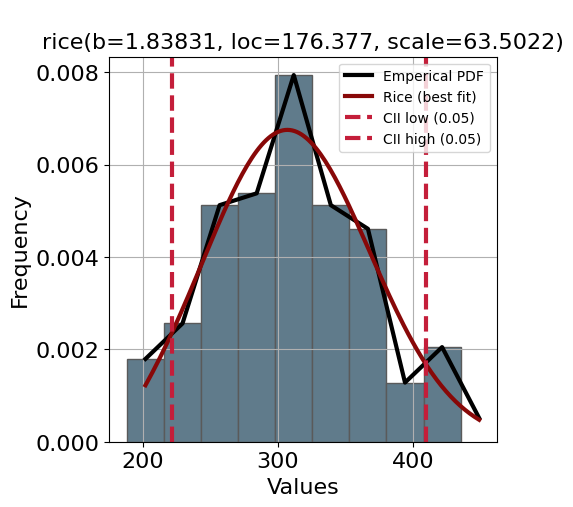

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,rice,0.000006,176.376967,63.502171,"(1.8383102204028114,)","(1.8383102204028114, 176.37696658002875, 63.50...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,johnsonsu,0.000006,-370.845156,355.375201,"(-18.92342238211078, 13.462602364649367)","(-18.92342238211078, 13.462602364649367, -370....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,pearson3,0.000006,312.09154,57.26458,"(0.2111679890636586,)","(0.2111679890636586, 312.0915398566668, 57.264...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,erlang,0.000006,-230.269749,6.046207,"(89.70273200532885,)","(89.70273200532885, -230.26974879587448, 6.046...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,gamma,0.000006,-230.269933,6.046205,"(89.70279896074413,)","(89.70279896074413, -230.26993331720652, 6.046...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000173,463.0,1.605908,"(0.17755209311846162,)","(0.17755209311846162, 463.0000000000001, 1.605...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,powerlognorm,0.000205,185.47013,2.265325,"(4.462438562450967e-06, 0.0058707175391488845)","(4.462438562450967e-06, 0.0058707175391488845,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,gompertz,0.002736,396.446707,7.117196,"(0.000511392822759545,)","(0.000511392822759545, 396.4467071788111, 7.11...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.251229,1.916957,1,"(0.17971591711903812,)","(0.17971591711903812, 1.9169566281726027, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----2-Cambio Plan----


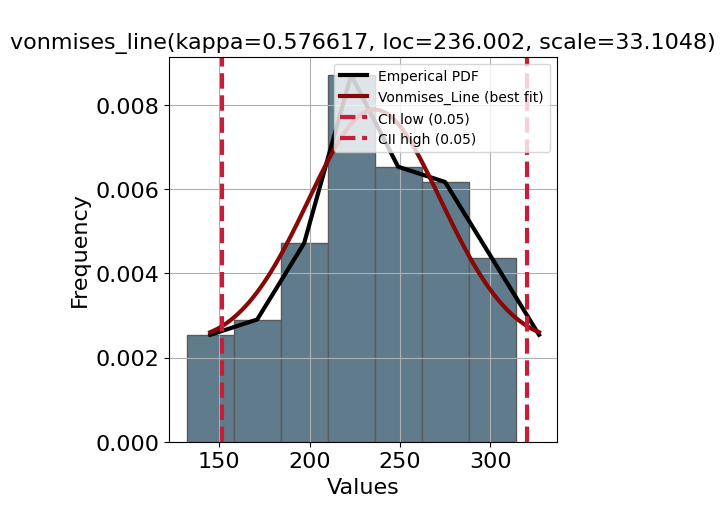

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,vonmises_line,0.000005,236.001721,33.104776,"(0.5766167546243479,)","(0.5766167546243479, 236.00172061083407, 33.10...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,triang,0.000006,117.759869,236.145044,"(0.521883198966117,)","(0.521883198966117, 117.7598689905305, 236.145...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,cosine,0.000006,237.879085,43.099978,(),"(237.8790854998843, 43.09997806016551)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,weibull_min,0.000006,72.775746,184.369602,"(3.789000811541279,)","(3.789000811541279, 72.77574562928584, 184.369...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,nakagami,0.000006,-8092.218022,8331.618463,"(6976.991835469891,)","(6976.991835469891, -8092.218022491104, 8331.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,exponpow,0.000197,132.0,1.540011,"(0.07178489215729668,)","(0.07178489215729668, 131.99999999999997, 1.54...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,genextreme,0.000198,338.68034,4.485886,"(3.3992749688838972,)","(3.3992749688838972, 338.6803404712585, 4.4858...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000218,128.021039,2.560174,"(5.435315731814036e-07, 0.0019138454994819254)","(5.435315731814036e-07, 0.0019138454994819254,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,truncnorm,0.000431,239.161176,10.224843,"(-2897.1191638856435, 9.862139353670024)","(-2897.1191638856435, 9.862139353670024, 239.1...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----3-Tecnica----


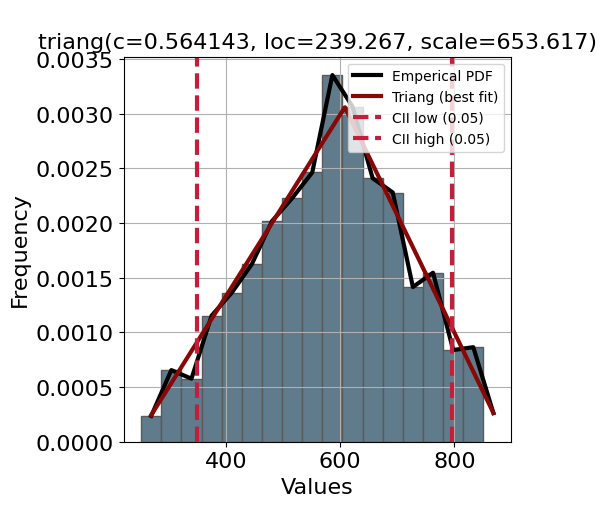

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000001,239.267023,653.616594,"(0.5641426179535971,)","(0.5641426179535971, 239.26702343623515, 653.6...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,weibull_min,0.000001,125.625878,503.97772,"(3.891940509092992,)","(3.891940509092992, 125.62587756985661, 503.97...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,pearson3,0.000001,581.204336,133.108738,"(-0.2228466788318547,)","(-0.2228466788318547, 581.2043357833732, 133.1...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,johnsonsu,0.000001,2160.707906,1023.60341,"(17.23425616488133, 14.169004119845482)","(17.23425616488133, 14.169004119845482, 2160.7...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,loggamma,0.000001,-1868.399193,723.252253,"(30.073555212680652,)","(30.073555212680652, -1868.3991929615975, 723....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,gompertz,0.000059,-7574.3141,96.673811,"(2.219975588541926e-26,)","(2.219975588541926e-26, -7574.314099657133, 96...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,rice,0.000059,226.316117,0.0,"(1.3053444453258112,)","(1.3053444453258112, 226.31611712332102, 3.902...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,exponweib,0.000061,251.0,1.309601,"(1.2466301743478765, 0.150097876166429)","(1.2466301743478765, 0.150097876166429, 250.99...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,halfgennorm,0.000064,251.0,1.379723,"(0.2588706777965437,)","(0.2588706777965437, 250.99999999999636, 1.379...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----3-Cancelacion----


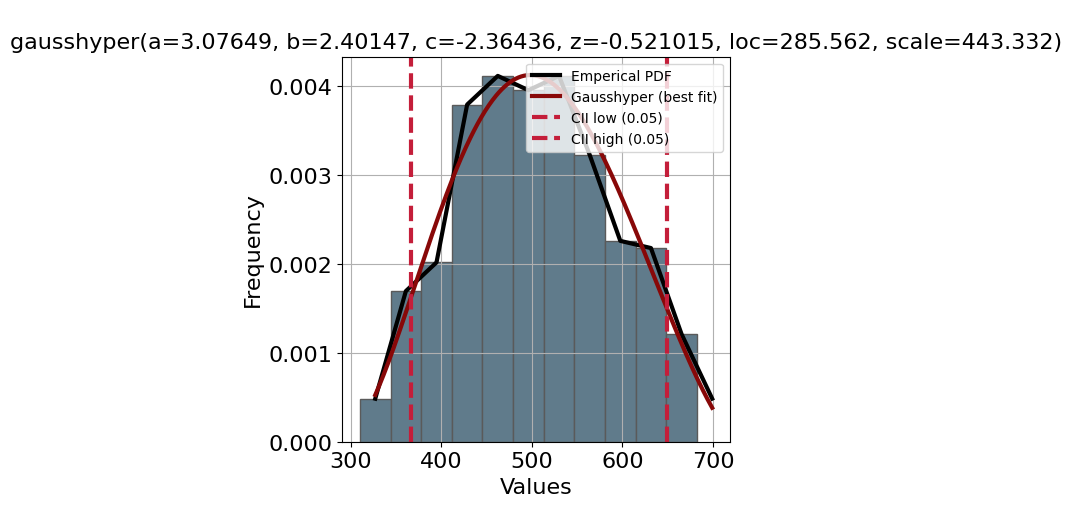

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,gausshyper,0.000001,285.562054,443.332188,"(3.076487007258406, 2.401467755269449, -2.3643...","(3.076487007258406, 2.401467755269449, -2.3643...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,triang,0.000001,302.602873,420.753047,"(0.4239948536910687,)","(0.4239948536910687, 302.6028732333197, 420.75...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,beta,0.000001,291.363192,444.303833,"(2.7335283813129836, 2.934577064164545)","(2.7335283813129836, 2.934577064164545, 291.36...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,johnsonsb,0.000001,271.555603,483.833236,"(0.0917645625945627, 1.234023248938472)","(0.0917645625945627, 1.234023248938472, 271.55...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,maxwell,0.000001,290.763175,133.504702,(),"(290.7631747401432, 133.50470230692125)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,weibull_max,0.000088,716.0,1.599717,"(0.16276407494883416,)","(0.16276407494883416, 716.0000000000001, 1.599...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,halfgennorm,0.000089,310.0,1.38152,"(0.275401085168854,)","(0.275401085168854, 310.0, 1.3815204332763429)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,gompertz,0.000093,4951.922952,0.0,"(1.587732985707383,)","(1.587732985707383, 4951.9229523291815, 4.5337...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,powerlognorm,0.000124,306.8012,2.760829,"(1.0241455490010177e-06, 0.002998258804247306)","(1.0241455490010177e-06, 0.002998258804247306,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----3-Otro----


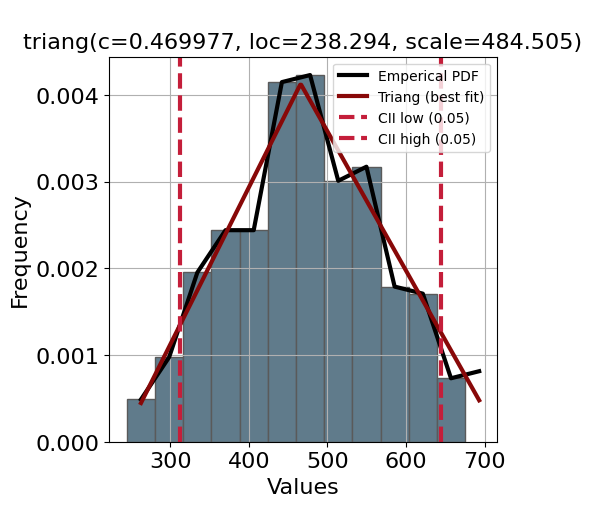

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000001,238.293735,484.505394,"(0.46997673822957414,)","(0.46997673822957414, 238.29373524068586, 484....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,weibull_min,0.000002,207.541749,300.153988,"(3.024118012732699,)","(3.024118012732699, 207.54174922287584, 300.15...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,gengamma,0.000002,122.911587,291.314191,"(1.9656823424542607, 2.7055088656224626)","(1.9656823424542607, 2.7055088656224626, 122.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,vonmises_line,0.000002,477.999875,74.166244,"(0.860086692139665,)","(0.860086692139665, 477.9998749574996, 74.1662...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,gausshyper,0.000002,217.373093,539.011184,"(3.2547019329904474, 3.186492953556213, -0.828...","(3.2547019329904474, 3.186492953556213, -0.828...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,exponweib,0.000077,245.0,0.526368,"(2.14285624225486, 0.14535740045427203)","(2.14285624225486, 0.14535740045427203, 244.99...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,foldnorm,0.000077,450.911306,83.405306,"(0.20414826125297703,)","(0.20414826125297703, 450.9113061818989, 83.40...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,halfgennorm,0.000078,245.0,1.386747,"(0.2710888990471869,)","(0.2710888990471869, 245.0, 1.3867474861112465)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,invweibull,0.00008,244.996533,1.41405,"(0.26249384670974785,)","(0.26249384670974785, 244.99653303173244, 1.41...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----3-Facturacion----


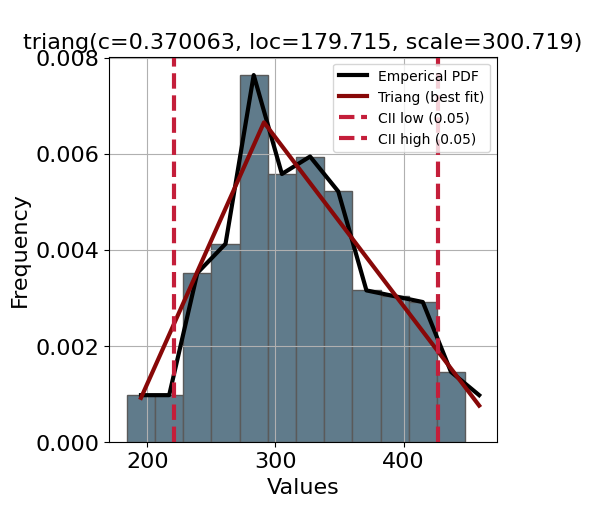

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000006,179.715091,300.718693,"(0.3700631566044752,)","(0.3700631566044752, 179.7150912267773, 300.71...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,betaprime,0.000007,-1.994872,310.540795,"(55.23326007022801, 54.25864928617914)","(55.23326007022801, 54.25864928617914, -1.9948...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,maxwell,0.000007,169.829625,93.827119,(),"(169.82962532362734, 93.8271191198619)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,powernorm,0.000007,239.436467,29.057356,"(0.12603240510067915,)","(0.12603240510067915, 239.43646717151233, 29.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,nakagami,0.000007,143.171939,187.481974,"(2.190316555076513,)","(2.190316555076513, 143.17193930693992, 187.48...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,rice,0.000209,276.998069,1.406005,"(1.965225788139099e-09,)","(1.965225788139099e-09, 276.9980690928058, 1.4...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,foldnorm,0.000213,276.999926,1.405626,"(6.26277764115781e-10,)","(6.26277764115781e-10, 276.9999259963596, 1.40...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,truncnorm,0.000214,-97846.651048,4836.80497,"(-163800.41808181256, 20.33503246220439)","(-163800.41808181256, 20.33503246220439, -9784...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,exponweib,0.000223,184.0,0.480373,"(2.611504353757133, 0.16325883770552657)","(2.611504353757133, 0.16325883770552657, 183.9...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----3-Cambio Plan----


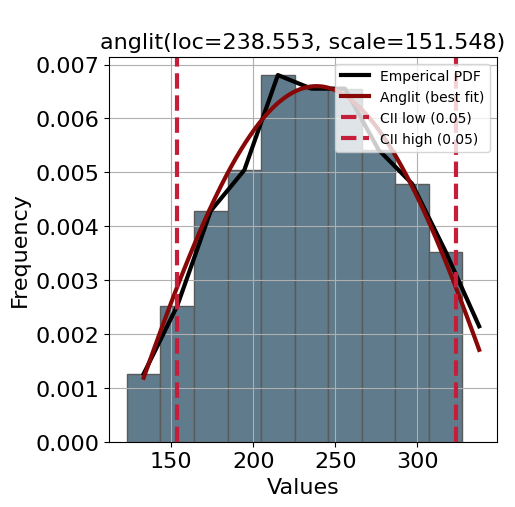

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,anglit,0.000001,238.552741,151.54843,(),"(238.55274073782482, 151.548429920021)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,beta,0.000001,119.403815,233.738277,"(2.0306713839119483, 1.9029215560284003)","(2.0306713839119483, 1.9029215560284003, 119.4...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,tukeylambda,0.000001,238.514171,53.466519,"(0.4480326200221439,)","(0.4480326200221439, 238.514170601037, 53.4665...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,johnsonsb,0.000002,112.430963,250.308757,"(-0.04425512598350395, 0.990342359629844)","(-0.04425512598350395, 0.990342359629844, 112....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,cosine,0.000002,239.631414,44.456496,(),"(239.63141355400316, 44.45649595496115)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,gengamma,0.000256,123.0,0.300158,"(2.2965676040559755, 0.18961790629185443)","(2.2965676040559755, 0.18961790629185443, 122....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,halfgennorm,0.000265,123.0,2.808886,"(0.33678411318846174,)","(0.33678411318846174, 122.9999999999979, 2.808...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,powerlognorm,0.000318,120.20945,2.633371,"(3.4423143588423775e-06, 0.004894111079032423)","(3.4423143588423775e-06, 0.004894111079032423,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,gompertz,0.000489,263.947838,5.37886,"(4.466333744807653e-06,)","(4.466333744807653e-06, 263.9478382105397, 5.3...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----4-Tecnica----


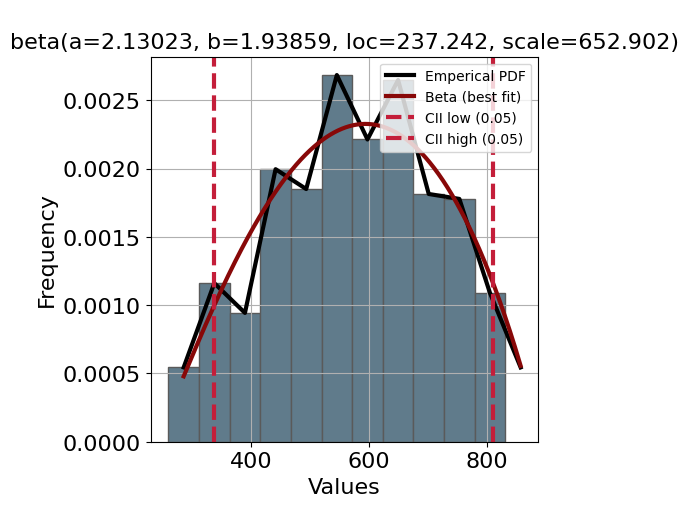

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,beta,0.000001,237.242279,652.902344,"(2.130232174985152, 1.9385864441781073)","(2.130232174985152, 1.9385864441781073, 237.24...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,gausshyper,0.000001,237.435095,652.741032,"(2.1248245738196347, 1.9430221237898804, 0.016...","(2.1248245738196347, 1.9430221237898804, 0.016...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,johnsonsb,0.000001,212.221343,699.255147,"(-0.12171146340883576, 1.0057577388744612)","(-0.12171146340883576, 1.0057577388744612, 212...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,anglit,0.000001,572.415409,418.749103,(),"(572.4154087749359, 418.7491027004331)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,cosine,0.000001,576.425056,123.024915,(),"(576.4250558225608, 123.02491488753216)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,halflogistic,0.000037,259.999999,121.263147,(),"(259.99999931984536, 121.26314717931142)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,powerlognorm,0.000041,246.742171,10.769604,"(7.629968101779834e-07, 0.0020686811531627197)","(7.629968101779834e-07, 0.0020686811531627197,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,truncnorm,0.000158,-5488.185194,530.181071,"(10.836645248359964, 1914.70839848559)","(10.836645248359964, 1914.70839848559, -5488.1...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.301559,2.898368,1,"(0.08037620069476184,)","(0.08037620069476184, 2.8983675995119142, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----4-Cancelacion----


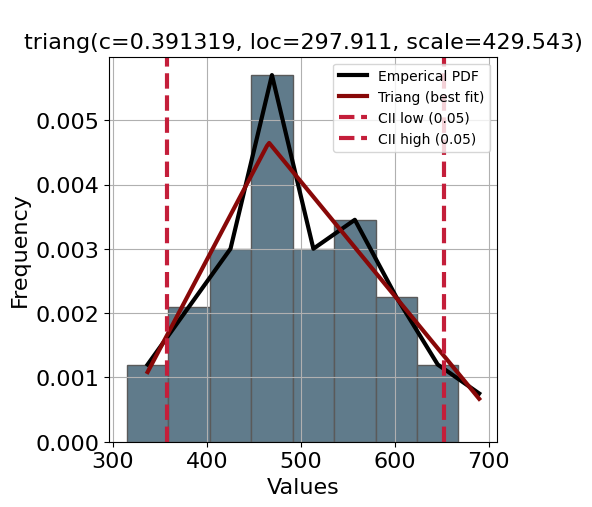

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,triang,0.000002,297.911454,429.543239,"(0.39131926871527495,)","(0.39131926871527495, 297.91145379043974, 429....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,dgamma,0.000003,506.282106,41.688705,"(1.7896849825128867,)","(1.7896849825128867, 506.2821059954226, 41.688...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,alpha,0.000004,-892.024944,21450.212976,"(15.504989981167686,)","(15.504989981167686, -892.02494399497, 21450.2...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,chi2,0.000004,-28.75809,7.708651,"(68.18817692400721,)","(68.18817692400721, -28.758089879957165, 7.708...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,pearson3,0.000004,496.880793,90.021779,"(0.34252649291482223,)","(0.34252649291482223, 496.88079302708167, 90.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,rice,0.000075,453.994003,1.87921,"(3.991017676020537e-10,)","(3.991017676020537e-10, 453.9940026921719, 1.8...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,gompertz,0.000075,5060.372638,0.0,"(1.587732985707383,)","(1.587732985707383, 5060.372638367536, 4.53372...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,truncnorm,0.000075,-111.050829,2.741406,"(160.83189916271334, 266.3065967341038)","(160.83189916271334, 266.3065967341038, -111.0...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.281265,-1.900742,1,"(0.1327531531450919,)","(0.1327531531450919, -1.9007418644328649, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----4-Otro----


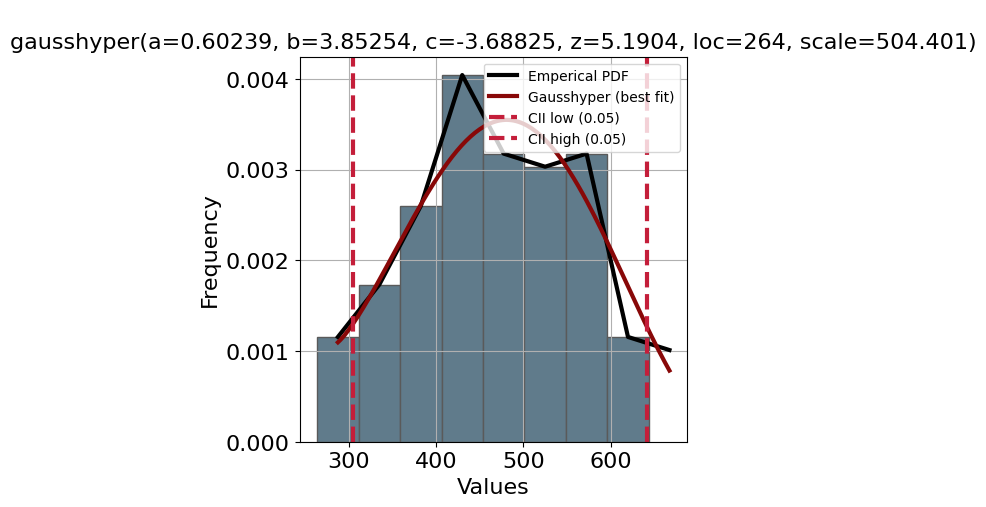

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,gausshyper,0.000001,264.0,504.40124,"(0.6023899129560009, 3.852543467632038, -3.688...","(0.6023899129560009, 3.852543467632038, -3.688...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,cosine,0.000001,472.507987,86.335663,(),"(472.50798682001187, 86.33566264809824)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,anglit,0.000002,474.759266,294.351814,(),"(474.7592657748395, 294.3518136944208)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,weibull_min,0.000002,200.621719,304.024601,"(2.986993495000068,)","(2.986993495000068, 200.6217190271758, 304.024...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,johnsonsb,0.000002,229.015827,500.155063,"(0.07613920483224162, 1.0375791807444794)","(0.07613920483224162, 1.0375791807444794, 229....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,chi,0.000059,264.0,4.69421,"(0.0002464471254167053,)","(0.0002464471254167053, 263.99999999999994, 4....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,powerlognorm,0.000066,260.275109,3.013074,"(1.1828831567284708e-06, 0.0031809651892696486)","(1.1828831567284708e-06, 0.0031809651892696486...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,gompertz,0.000074,635.999998,4.372614,"(1.7625225458477606e-05,)","(1.7625225458477606e-05, 635.9999982228926, 4....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,vonmises,0.221847,1.304909,1,"(0.06739866753980962,)","(0.06739866753980962, 1.3049093109649004, 1)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----4-Facturacion----


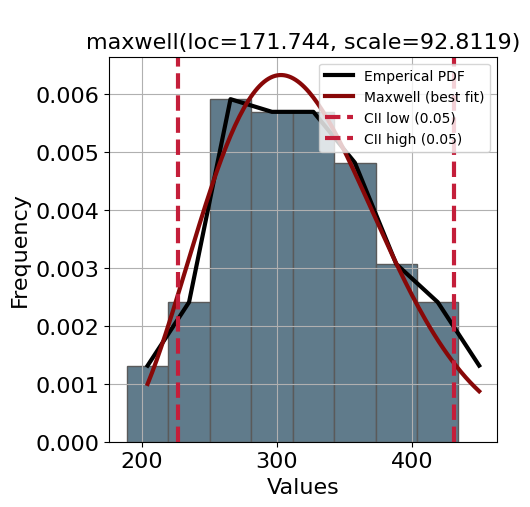

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,maxwell,0.000002,171.744175,92.811917,(),"(171.74417531956436, 92.8119169456942)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,powernorm,0.000002,222.983143,21.172265,"(0.05861073412828916,)","(0.05861073412828916, 222.98314279668398, 21.1...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,chi,0.000002,166.762181,91.839325,"(3.2422607988075796,)","(3.2422607988075796, 166.76218148502835, 91.83...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,weibull_min,0.000002,173.733328,165.160302,"(2.577148828621999,)","(2.577148828621999, 173.73332770181662, 165.16...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,triang,0.000002,183.571276,294.344681,"(0.35818117566409136,)","(0.35818117566409136, 183.5712762029754, 294.3...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,gengamma,0.000137,189.0,0.273564,"(2.4515195668807115, 0.19770465891242148)","(2.4515195668807115, 0.19770465891242148, 188....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,powerlognorm,0.000168,187.054615,1.535648,"(3.5462681355484847e-06, 0.005815565397412657)","(3.5462681355484847e-06, 0.005815565397412657,...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,wrapcauchy,0.000182,189.0,43.926764,"(0.5,)","(0.5, 189.0, 43.926764293363114)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,gompertz,0.000483,366.751268,11.590706,"(0.0037681546437236075,)","(0.0037681546437236075, 366.75126779654875, 11...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------
----4-Cambio Plan----


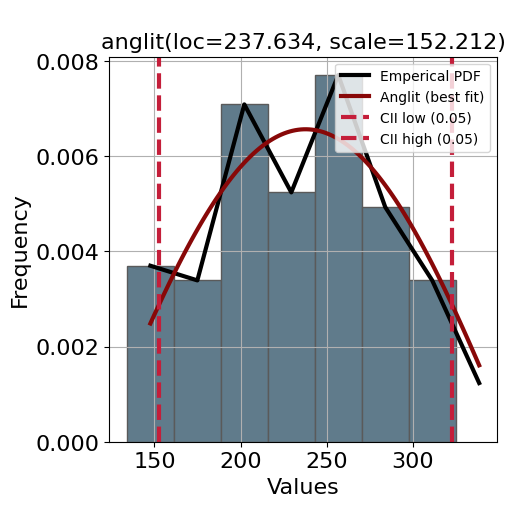

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,anglit,0.000008,237.633751,152.211563,(),"(237.63375108491562, 152.2115634530045)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,tukeylambda,0.000008,237.667553,53.152229,"(0.44157950509755417,)","(0.44157950509755417, 237.66755301656596, 53.1...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,rdist,0.000008,238.001127,118.797249,"(4.108068220874275,)","(4.108068220874275, 238.0011265636751, 118.797...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
3,cosine,0.000009,235.446667,44.575083,(),"(235.44666692683995, 44.57508290866954)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
4,dweibull,0.000009,232.560197,48.579971,"(1.5400100005168271,)","(1.5400100005168271, 232.56019721473888, 48.57...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
...,...,...,...,...,...,...,...,...,...,...
75,exponpow,0.000173,134.0,1.444712,"(0.07324328197915382,)","(0.07324328197915382, 133.99999999999997, 1.44...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
76,weibull_max,0.000179,352.0,1.575627,"(0.1951942658060445,)","(0.1951942658060445, 352.00000000000006, 1.575...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
77,wrapcauchy,0.000218,134.0,34.695778,"(0.5,)","(0.5, 134.0, 34.69577759403319)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999
78,gompertz,0.007413,290.999998,3.898464,"(3.3358198922913743e-06,)","(3.3358198922913743e-06, 290.9999980352377, 3....",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


-------------------------------------------


In [13]:
_data_ = {}
"""array(['Juan Lopez', 'Teresa Rodriguez', 'Luis Meza', 'Luisa Diaz',
       'Rocio  Peña', 'Daniel Medina', 'Josue Fandiño', 'Jose Perez',
       'Dayana Perea', 'Maria Tello', 'Diana Yepes', 'Juan Zarate',
       'Fernando Giraldo', 'Jose Ramirez', 'Margarita Beltran',
       'Carmen Gomez', 'Camila Arias'], dtype=object)"""
cuadrillas = {
    1: ['Daniel Medina', 'Josue Fandiño', 'Jose Perez', 'Maria Tello', 'Dayana Perea'],
    2: ['Camila Arias', 'Carmen Gomez'],
    3: ['Juan Lopez', 'Luis Meza', 'Rocio Peña', 'Teresa Rodriguez', 'Luisa Diaz'],
    4: ['Fernando Giraldo', 'Jose Ramirez', 'Juan Zarate', 'Diana Yepes', 'Margarita Beltran']
}
for i in cuadrillas:
    for j in data['tiposerv.'].unique():
        _data_[f'{i}-{j}'] = data[data['tiposerv.']==j][data['estado']!='Abandono'][data['servidor'].isin(cuadrillas[i])]

for i in _data_:
    print(f'----{i}----')
    _data_[i]['num_duracion'].hist(bins=50)
    plt.title(i)
    plt.show()
    scatter_plot(_data_[i]['num_duracion'])
    corridas_arriba_y_abajo(_data_[i]['num_duracion'].values)
    print("-------------------------------------------")
for i in _data_:
    print(f'----{i}----')
    h = pettitt_test(_data_[i]['num_duracion'].values)
    print(f'Para los datos por tipo de servicio: {i}\nTest de Pettitt: {h[2]} < 0.05, {"si" if h[2] < 0.05 else "no"} se rechaza H0 la homogeneidad')
for i in _data_:
    print(f'----{i}----')
    dist = distfit(distr='full', verbose=0)
    dist.fit_transform(_data_[i]['num_duracion'].values)
    dist.plot(figsize=(5,5))
    plt.show()
    display(dist.summary)
    print("-------------------------------------------")